##                                          Importar Librerias Necesarias Para El Analisis

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

###                                                     AVANCE 1

Importar Data Base

In [85]:
data_latinoamerica = pd.read_csv("data_latinoamerica.csv", sep=",")

In [86]:
data_latinoamerica

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

In [87]:
data_latinoamerica.shape

(12216057, 50)

verificar el tipo de los datos

In [88]:
data_latinoamerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

filtrar por los paises requeridos para el analisis

In [89]:
                              #Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil.

paises_seleccionados = ["Colombia", "Argentina","Chile","Mexico","Peru","Brazil"]
latinoamerica = data_latinoamerica[data_latinoamerica["country_name"].isin(paises_seleccionados)]


In [90]:
latinoamerica.shape

(11970289, 50)

filtrar por la fecha requerida

In [91]:

latinoamerica_fecha = latinoamerica[latinoamerica["date"]>"2021-01-01"]
latinoamerica_fecha.shape

(7537296, 50)

                                        VERIFICACION Y CAMBIO DE LOS VALORES NULOS


In [92]:
latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [93]:
#se verifica location_key donde se ve que cada pais tiene varias locaciones y se repite la informacion de los paises 
latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

Se selecciona la LOCATION_KEY ya que se verifico que al selecionar por pais hay valores repetidos

In [94]:
latinoamerica_paises = latinoamerica[latinoamerica["location_key"].isin(["AR","CL","CO","MX","PE","BR"])]

latinoamerica_paises.shape


(5946, 50)

se vuelve a filtrar por la fecha requerida

In [95]:

latinoamerica_fechas = latinoamerica_paises[latinoamerica_paises["date"]>"2021-01-01"]
latinoamerica_fechas.shape

(3744, 50)

se veririfica la cantidad de nulos

In [96]:
latam_nulos = latinoamerica_fechas.isnull().sum() [latinoamerica_fechas.isnull().sum()>0]
print(latam_nulos) 

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


se crea un ciclo for doble para que esos valores nulos los rellene con la media por pais

In [97]:
excluir = ["new_recovered", "cumulative_recovered","cumulative_vaccine_doses_administered"]

for pais in paises_seleccionados:
    for i in latam_nulos.index:
            if i not in excluir:    
                latinoamerica_fechas.loc[latinoamerica_fechas["country_name"] == pais, i] = latinoamerica_fechas.loc[latinoamerica_fechas["country_name"] == pais, i].fillna(round(latinoamerica_fechas.loc[latinoamerica_fechas["country_name"] == pais, i].mean()))

se crea doble ciclo for para rellenar con 0 los valores nulos

In [98]:
for pais in paises_seleccionados:
    for i in latam_nulos.index:

        if i in excluir:    

            latinoamerica_fechas.loc[latinoamerica_fechas["country_name"] == pais, i]  = latinoamerica_fechas.loc[latinoamerica_fechas["country_name"] == pais, i].fillna(0)

se verifica si modificaron y no quedaron valores nulos

In [99]:
latam_nulos = latinoamerica_fechas.isnull().sum() [latinoamerica_fechas.isnull().sum()>0]
print(latam_nulos) 


Series([], dtype: int64)


examinar caracterisiticas de ibucion de la dataset

In [100]:
latinoamerica_fechas.head

<bound method NDFrame.head of          location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru         5032.0   
10253874           PE  2022-09-15           PE         Peru         5032.0   
10253875           PE  2022-09-16           PE         Peru         5032.0   
10253876           PE  2022-09-17           PE         Peru         5032.0   

          new_deceased  cumulativ

In [101]:
latinoamerica_fechas.info

<bound method DataFrame.info of          location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru         5032.0   
10253874           PE  2022-09-15           PE         Peru         5032.0   
10253875           PE  2022-09-16           PE         Peru         5032.0   
10253876           PE  2022-09-17           PE         Peru         5032.0   

          new_deceased  cumulat

In [102]:
latinoamerica_fechas.describe

<bound method NDFrame.describe of          location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru         5032.0   
10253874           PE  2022-09-15           PE         Peru         5032.0   
10253875           PE  2022-09-16           PE         Peru         5032.0   
10253876           PE  2022-09-17           PE         Peru         5032.0   

          new_deceased  cumul

guardando los datos limpios del dataset

In [103]:
latinoamerica_fechas.to_csv("DatosFinalesFiltrado.csv", index=False)

cargamos el archivo de datos finales

In [104]:
datos_finales = pd.read_csv("DatosFinalesFiltrado.csv")

In [105]:
datos_finales.shape

(3744, 50)

In [106]:
datos_finales ["date"] = pd.to_datetime(datos_finales["date"])

In [107]:
datos_finales.set_index("date",inplace=True)

In [108]:
datos_finales.shape

(3744, 49)

bucles for y/o while para el cálculo de estadísticas descriptivas 

In [109]:
for j in datos_finales.columns:
    print(j)
    print(datos_finales[j].describe())
    print("________________________________________")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________________________________
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
________________________________________
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
_____________________________________

In [110]:
j = 0
while j<len(datos_finales.columns):
    print(datos_finales.columns[j])
    print(datos_finales[datos_finales.columns[j]].describe())
    print("________________________________________")
    j += 1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
________________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
________________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
________________________________________
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
________________________________________
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
_____________________________________

 función que permita obtener la mediana, varianza y el rango.

In [111]:
def descripcion_datos(datos):
    for j in datos.columns:
        if datos[j].dtype=="float64" or datos[j].dtype=="int64":
            print(j)
            print("Mediana", datos[j].median())
            print("Varianza", datos[j].var())
            print("Rango", datos[j].max()-datos[j].min())
            print("Moda", datos[j].mode()[0])
            print("___________________________________________")

descripcion_datos(datos_finales)
            

            

new_confirmed
Mediana 5214.0
Varianza 586577491.1622744
Rango 298981.0
Moda 0.0
___________________________________________
new_deceased
Mediana 100.5
Varianza 257292.47863447666
Rango 11447.0
Moda 0.0
___________________________________________
cumulative_confirmed
Mediana 3632143.5
Varianza 63828420111296.516
Rango 34567862.0
Moda 6093645.0
___________________________________________
cumulative_deceased
Mediana 139614.0
Varianza 33415398047.038906
Rango 685202.0
Moda 128994.0
___________________________________________
cumulative_vaccine_doses_administered
Mediana 32445756.5
Varianza 8551958275078892.0
Rango 347868481.0
Moda 0.0
___________________________________________
population
Mediana 47910798.0
Varianza 4507478439615793.0
Rango 194985406.0
Moda 17574003.0
___________________________________________
population_male
Mediana 22254165.0
Varianza 1101239940970119.2
Rango 95463769.0
Moda 8972014.0
___________________________________________
population_female
Mediana 23245825.0
Varia

### AVANCE 2

analisis estadistico con Pandas y Numpy

In [112]:
for j in datos_finales.columns:
    print(j)
    print(datos_finales[j].describe())
    print("___________________________________")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
___________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
___________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
___________________________________
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
___________________________________
new_deceased
count     3744.000000
mean       276.886218
std        507.240060
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
___________________________________
cumulative_confirmed


media, mediana, desviacion estandar, rango

In [113]:
def datos_avance(datos):
    for j in datos.columns:
        if datos[j].dtype == "float64" or datos[j].dtypes == "int64":
            print(j)
            print("Media:", datos[j].mean())
            print("Mediana:", datos[j].median())
            print("Desviación Estándar:", datos[j].std())
            print("Rango:", datos[j].max() - datos[j].min())
            print("_________________________________________________")

datos_avance(datos_finales)  # Aquí está la llamada correcta a la función


new_confirmed
Media: 13921.90811965812
Mediana: 5214.0
Desviación Estándar: 24219.36190658776
Rango: 298981.0
_________________________________________________
new_deceased
Media: 276.88621794871796
Mediana: 100.5
Desviación Estándar: 507.2400601633083
Rango: 11447.0
_________________________________________________
cumulative_confirmed
Media: 6777073.632211538
Mediana: 3632143.5
Desviación Estándar: 7989269.0598888025
Rango: 34567862.0
_________________________________________________
cumulative_deceased
Media: 192957.9014423077
Mediana: 139614.0
Desviación Estándar: 182798.79115311158
Rango: 685202.0
_________________________________________________
cumulative_vaccine_doses_administered
Media: 65444735.39636752
Mediana: 32445756.5
Desviación Estándar: 92476798.57715064
Rango: 347868481.0
_________________________________________________
population
Media: 77721474.16666667
Mediana: 47910798.0
Desviación Estándar: 67137757.18338968
Rango: 194985406.0
___________________________________

Correlacion

In [114]:
correlaion = datos_finales.select_dtypes(include=["float64","int64"]).columns
correlaion_matrix = datos_finales[correlaion].corr()
print(correlaion_matrix)

                                       new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.523935   
new_deceased                                0.523935      1.000000   
cumulative_confirmed                        0.430351      0.192483   
cumulative_deceased                         0.397367      0.267777   
cumulative_vaccine_doses_administered       0.305808     -0.014796   
population                                  0.501047      0.452819   
population_male                             0.497696      0.453062   
population_female                           0.496171      0.452274   
population_rural                            0.369373      0.390866   
population_urban                            0.493935      0.447692   
population_density                         -0.137173     -0.006206   
human_development_index                    -0.115514     -0.227649   
population_age_00_09                        0.439263      0.420913   
population_age_10_19

    VISUALIZACION DE DATOS

In [115]:
datos_finales.shape

(3744, 49)

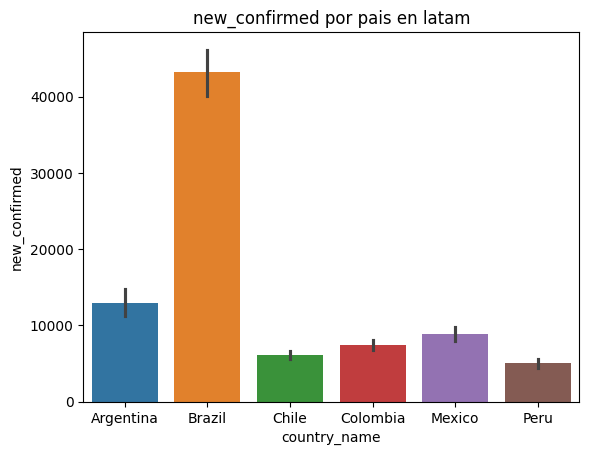

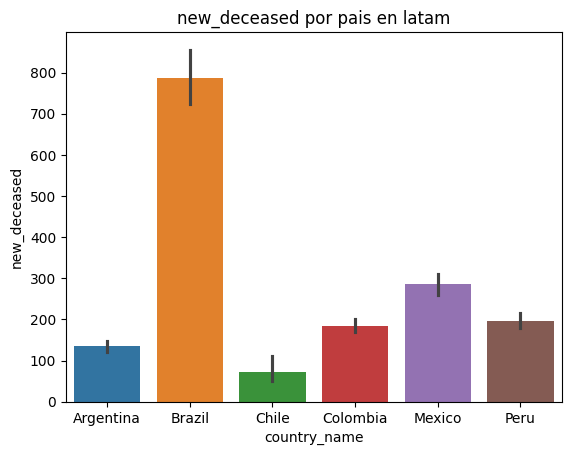

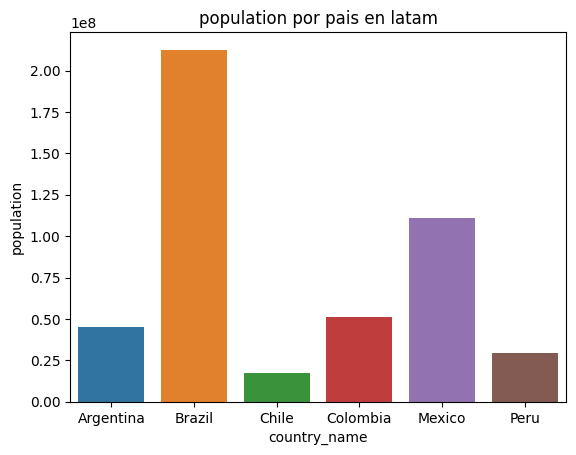

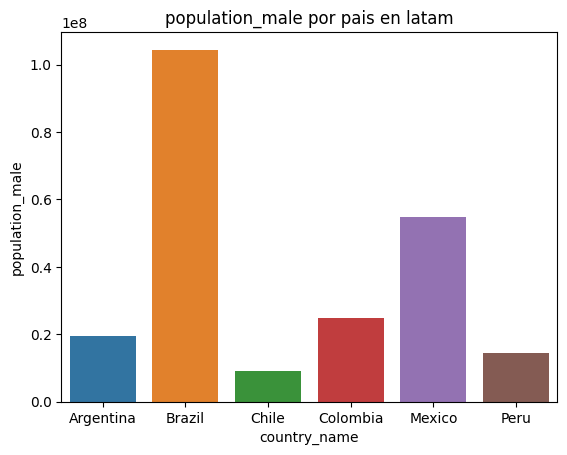

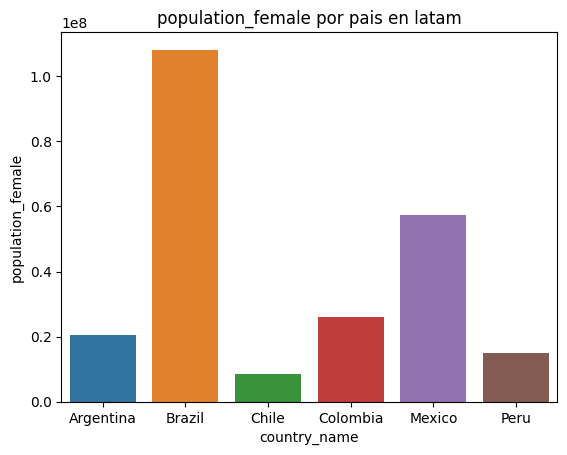

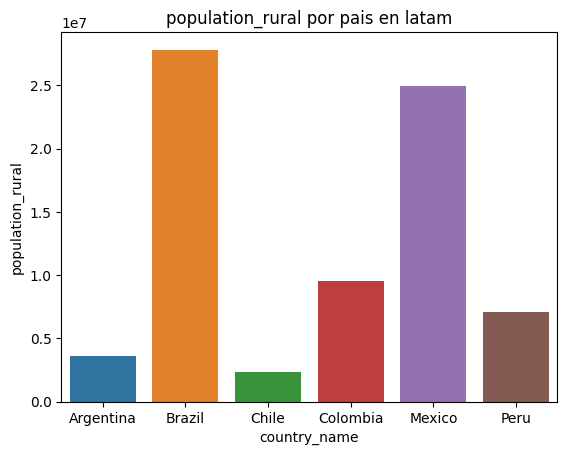

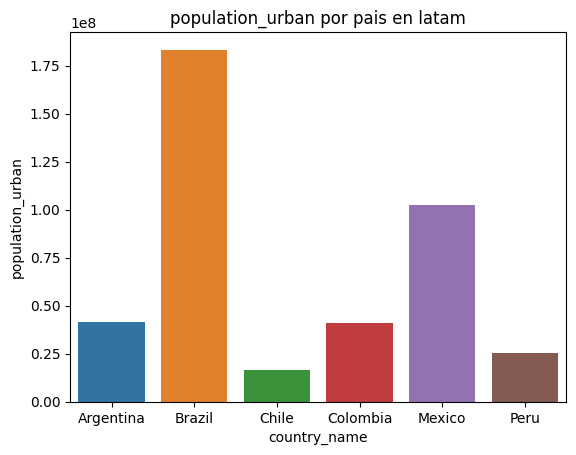

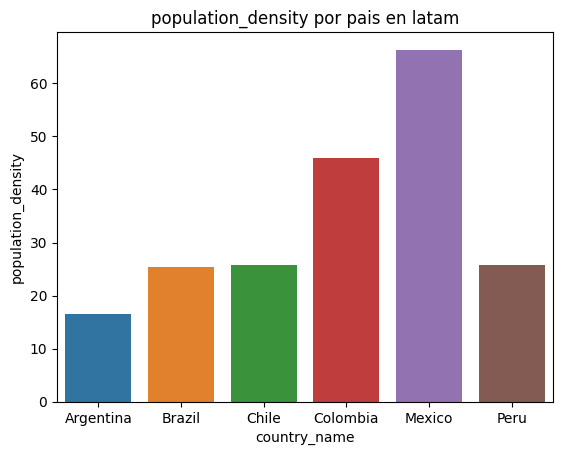

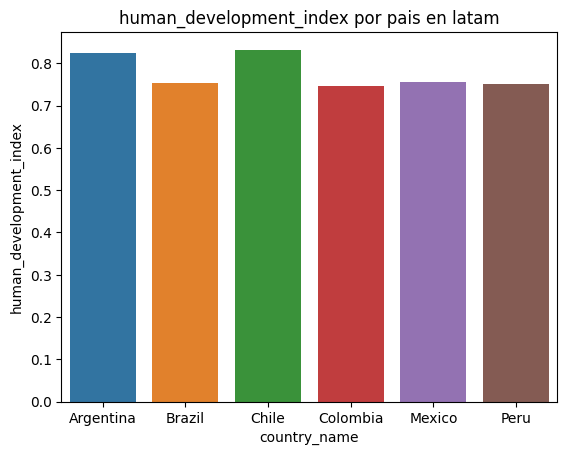

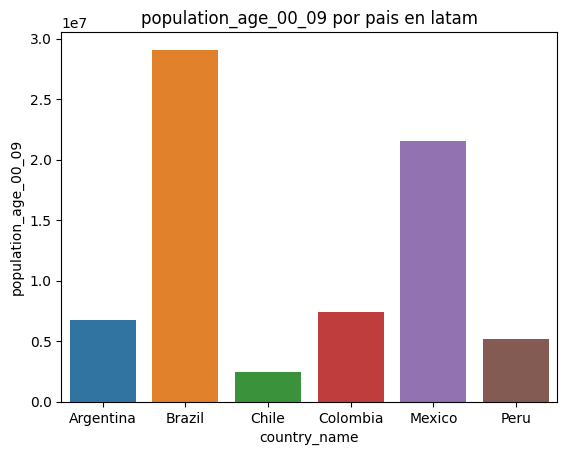

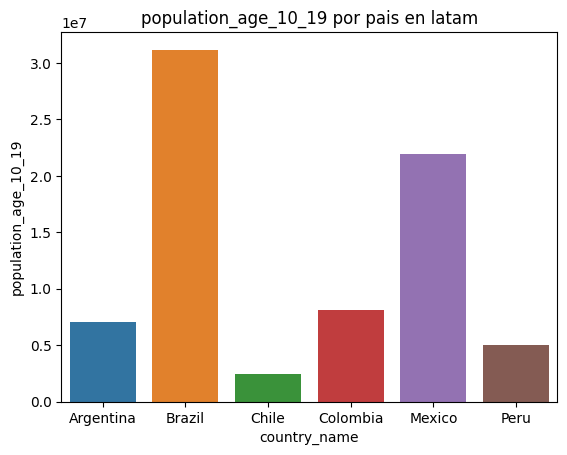

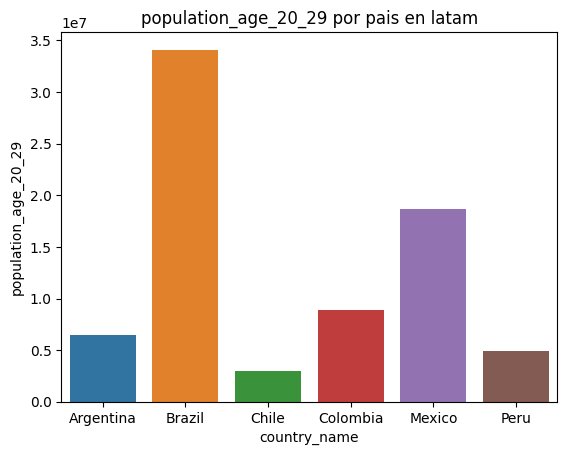

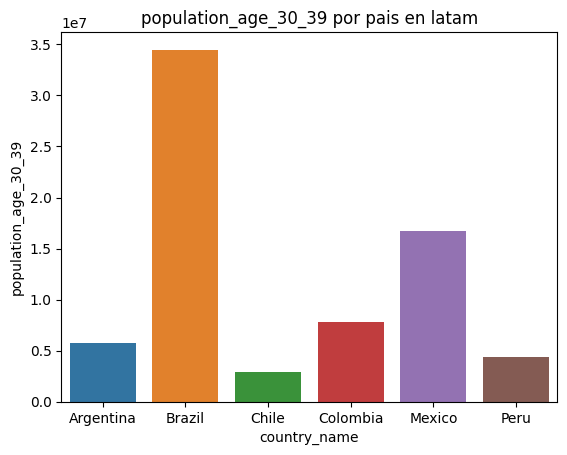

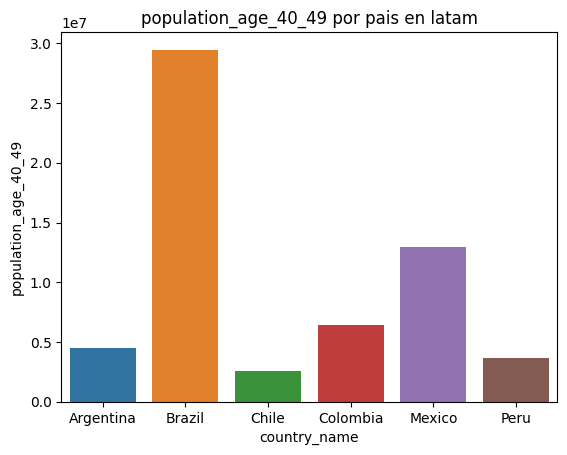

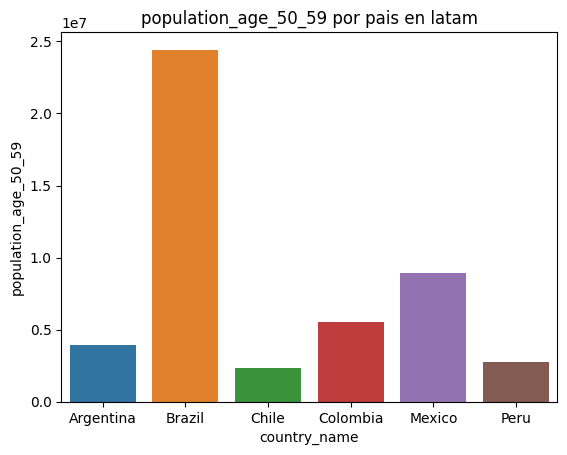

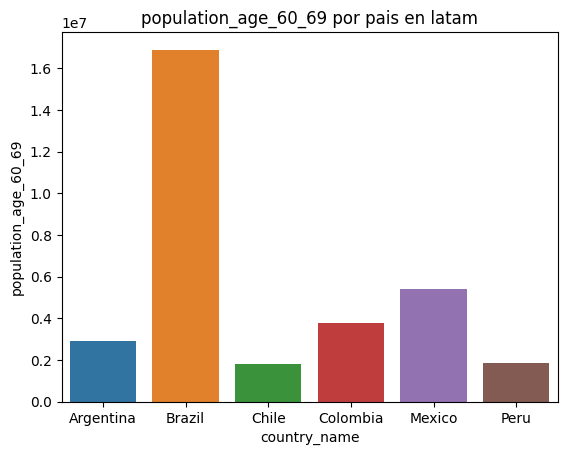

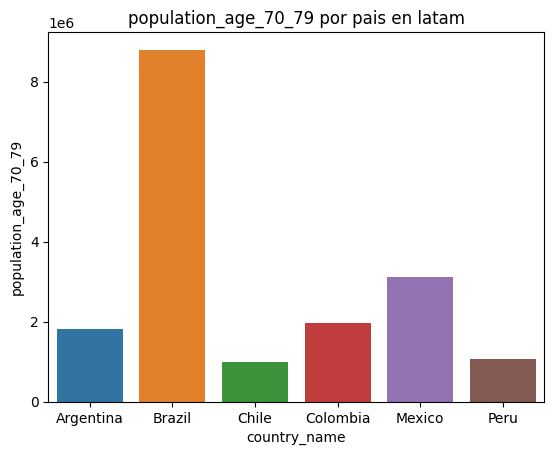

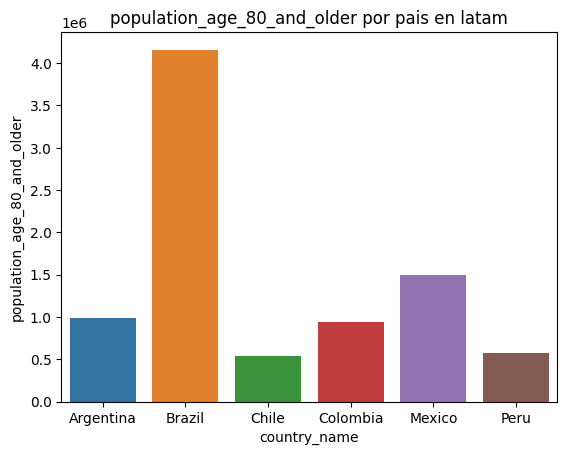

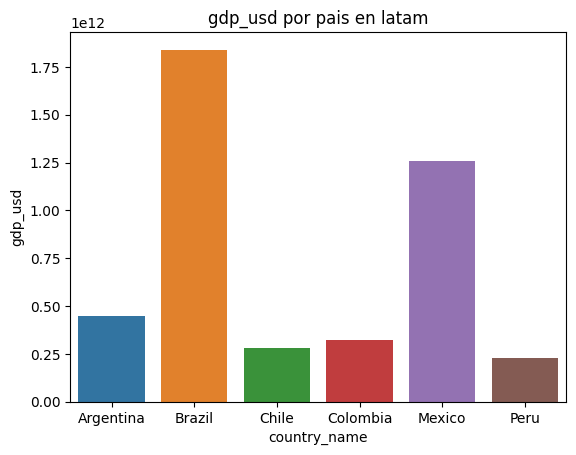

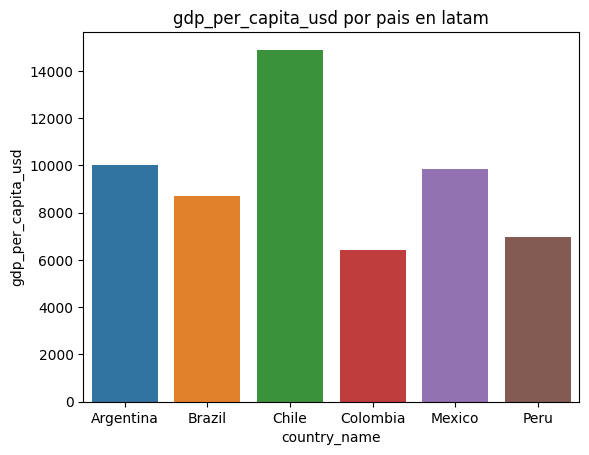

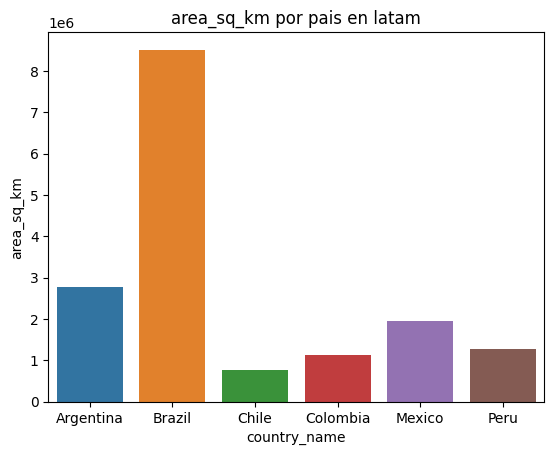

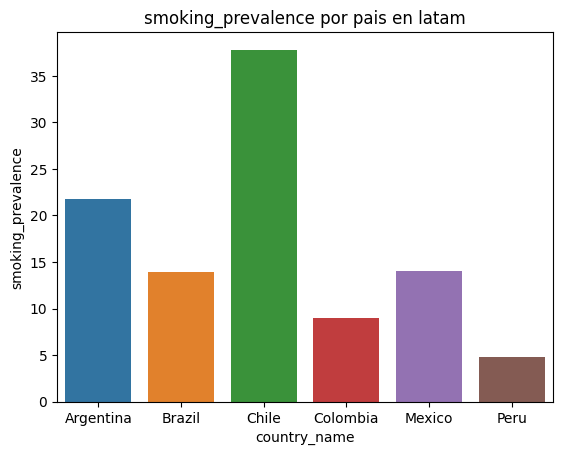

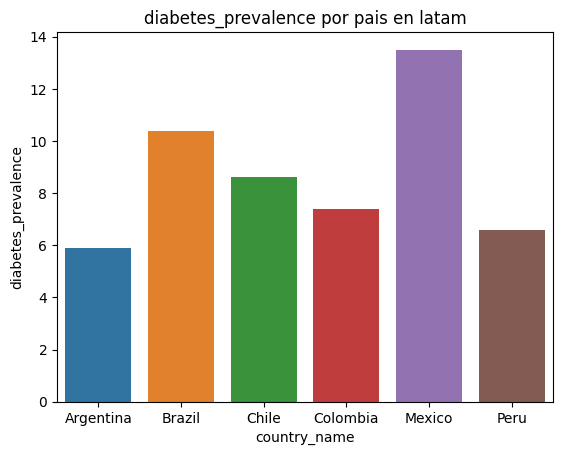

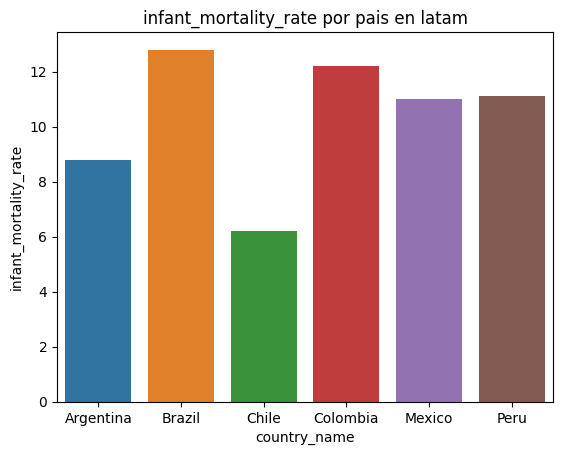

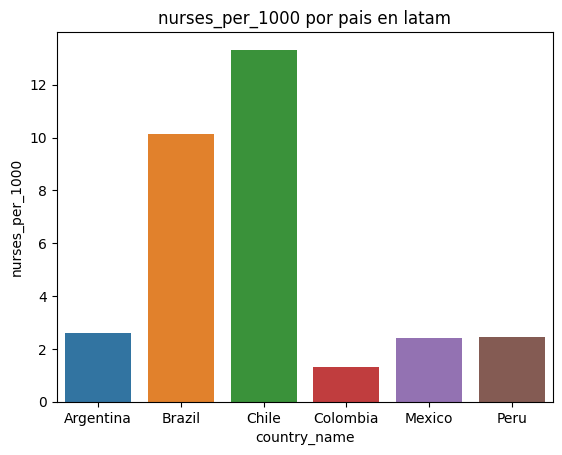

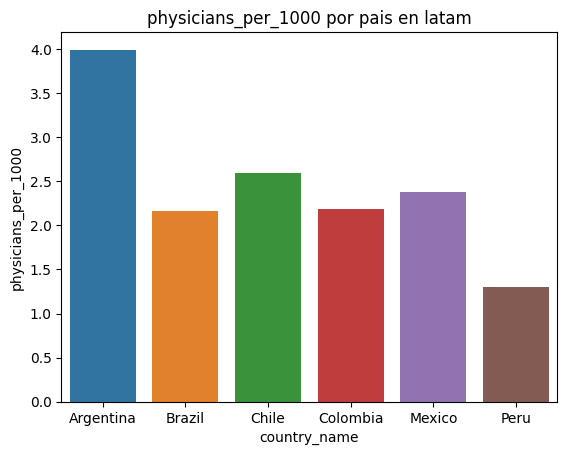

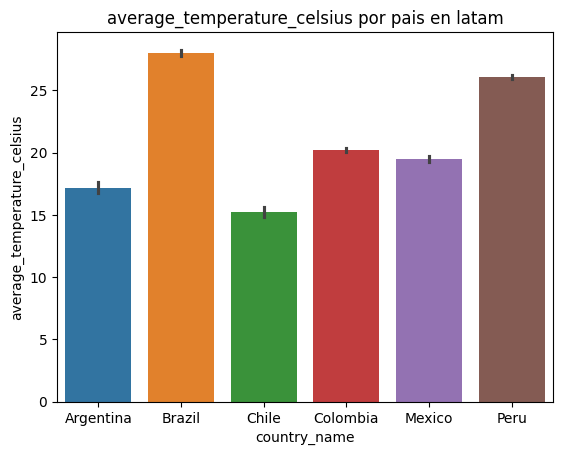

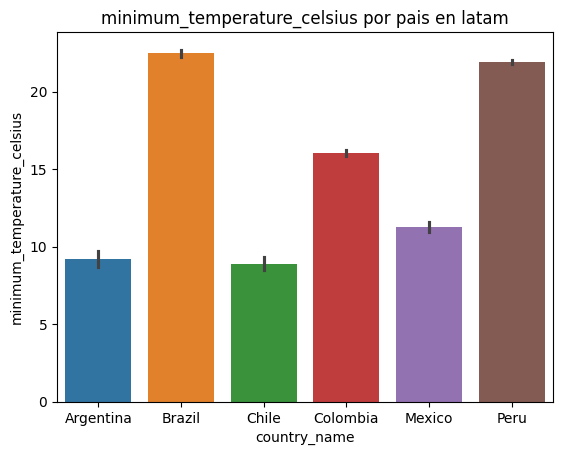

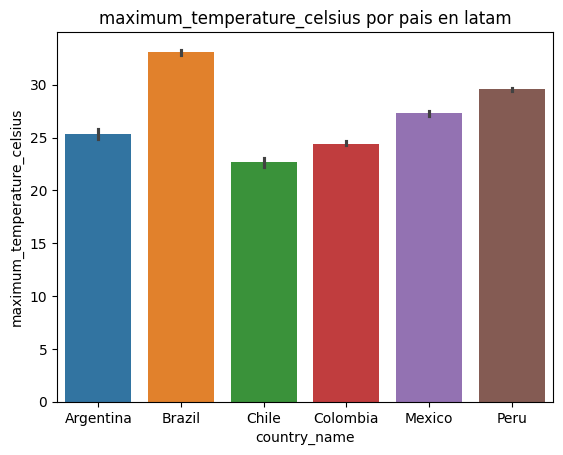

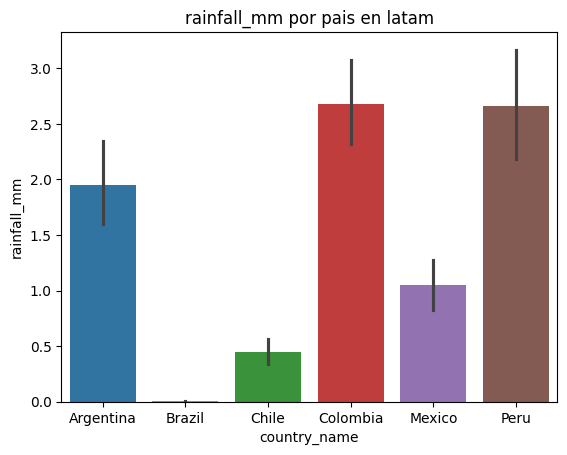

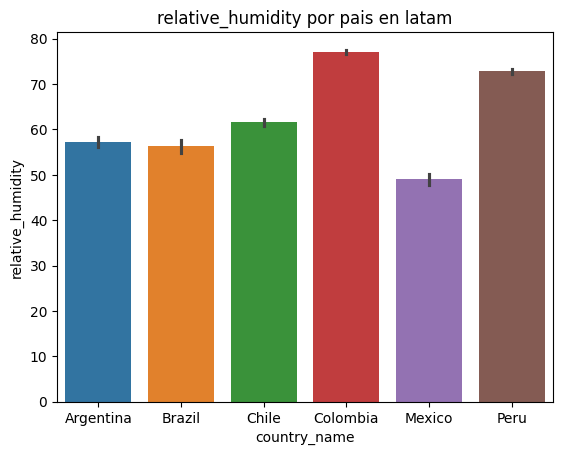

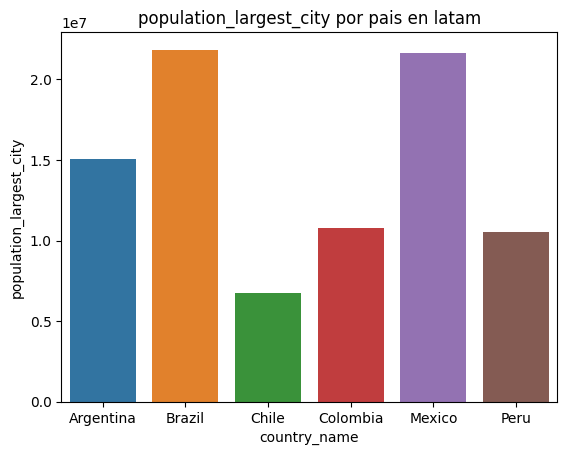

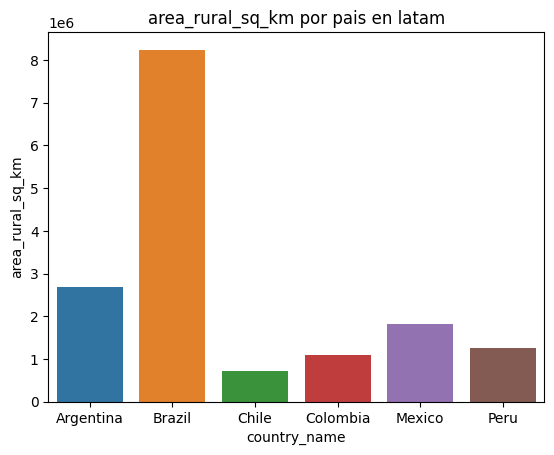

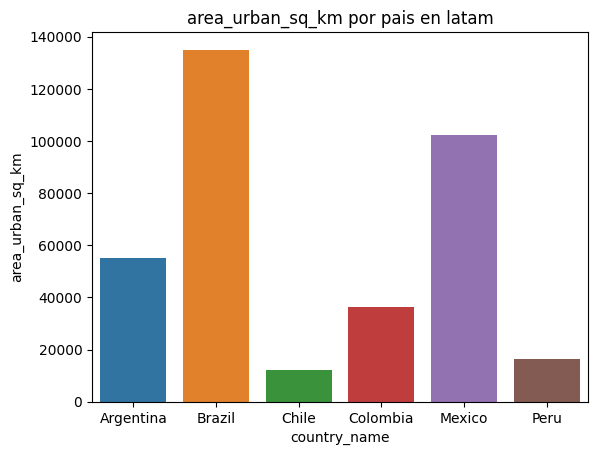

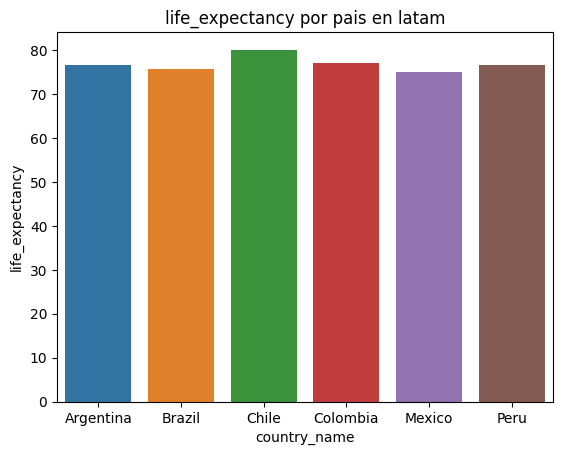

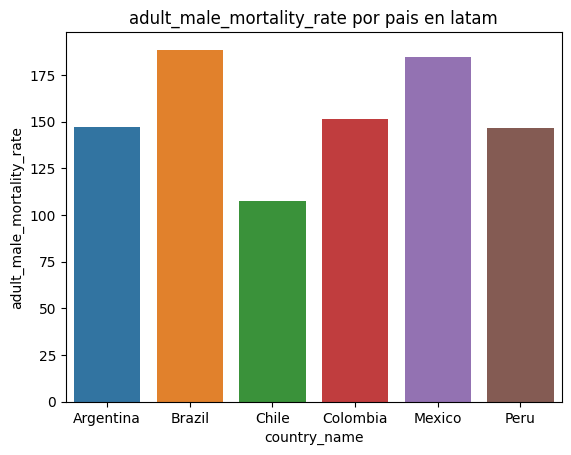

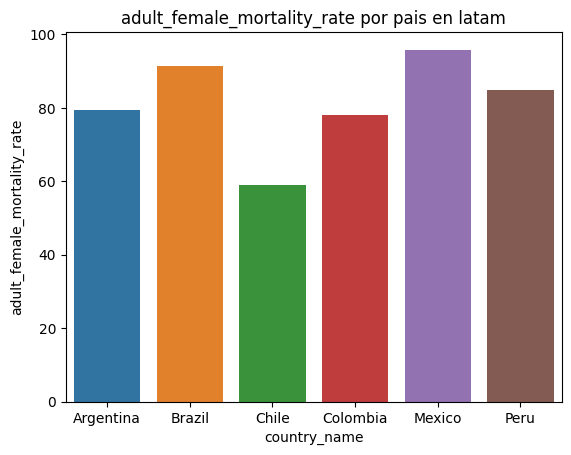

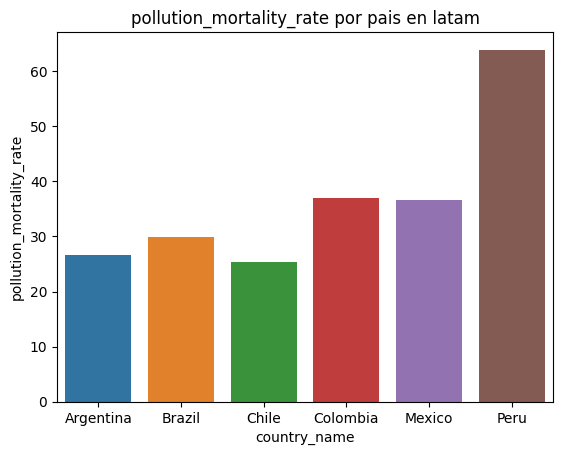

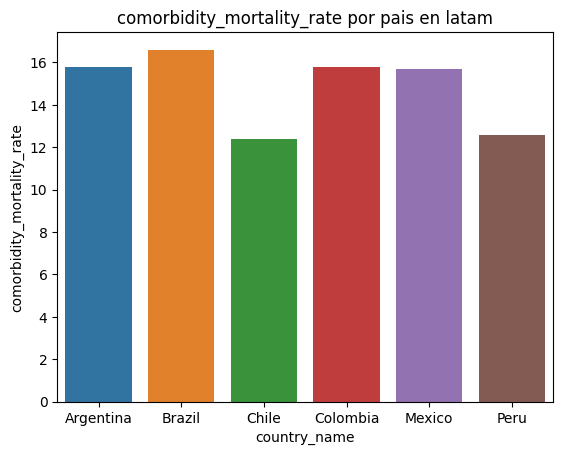

In [116]:
for j in datos_finales:
    if j not in  ["location_key","date","country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_deceased","cumulative_recovered",
        "cumulative_vaccine_doses_administered","new_recovered"]:
        fig, ax = plt.subplots(figure = (5, 3))
        sns.barplot(x= "country_name", y = j ,data=datos_finales, ax = ax, hue = "country_name")
        plt.title(f"{j} por pais en latam")
        plt.show()

creacion de la mascara para la correlacion 

In [117]:
mascara = np.triu(np.ones_like(correlaion_matrix, dtype= bool))

correlaion_matrix = correlaion_matrix[abs(correlaion_matrix)> abs(0.5)]

creacion de la grafica

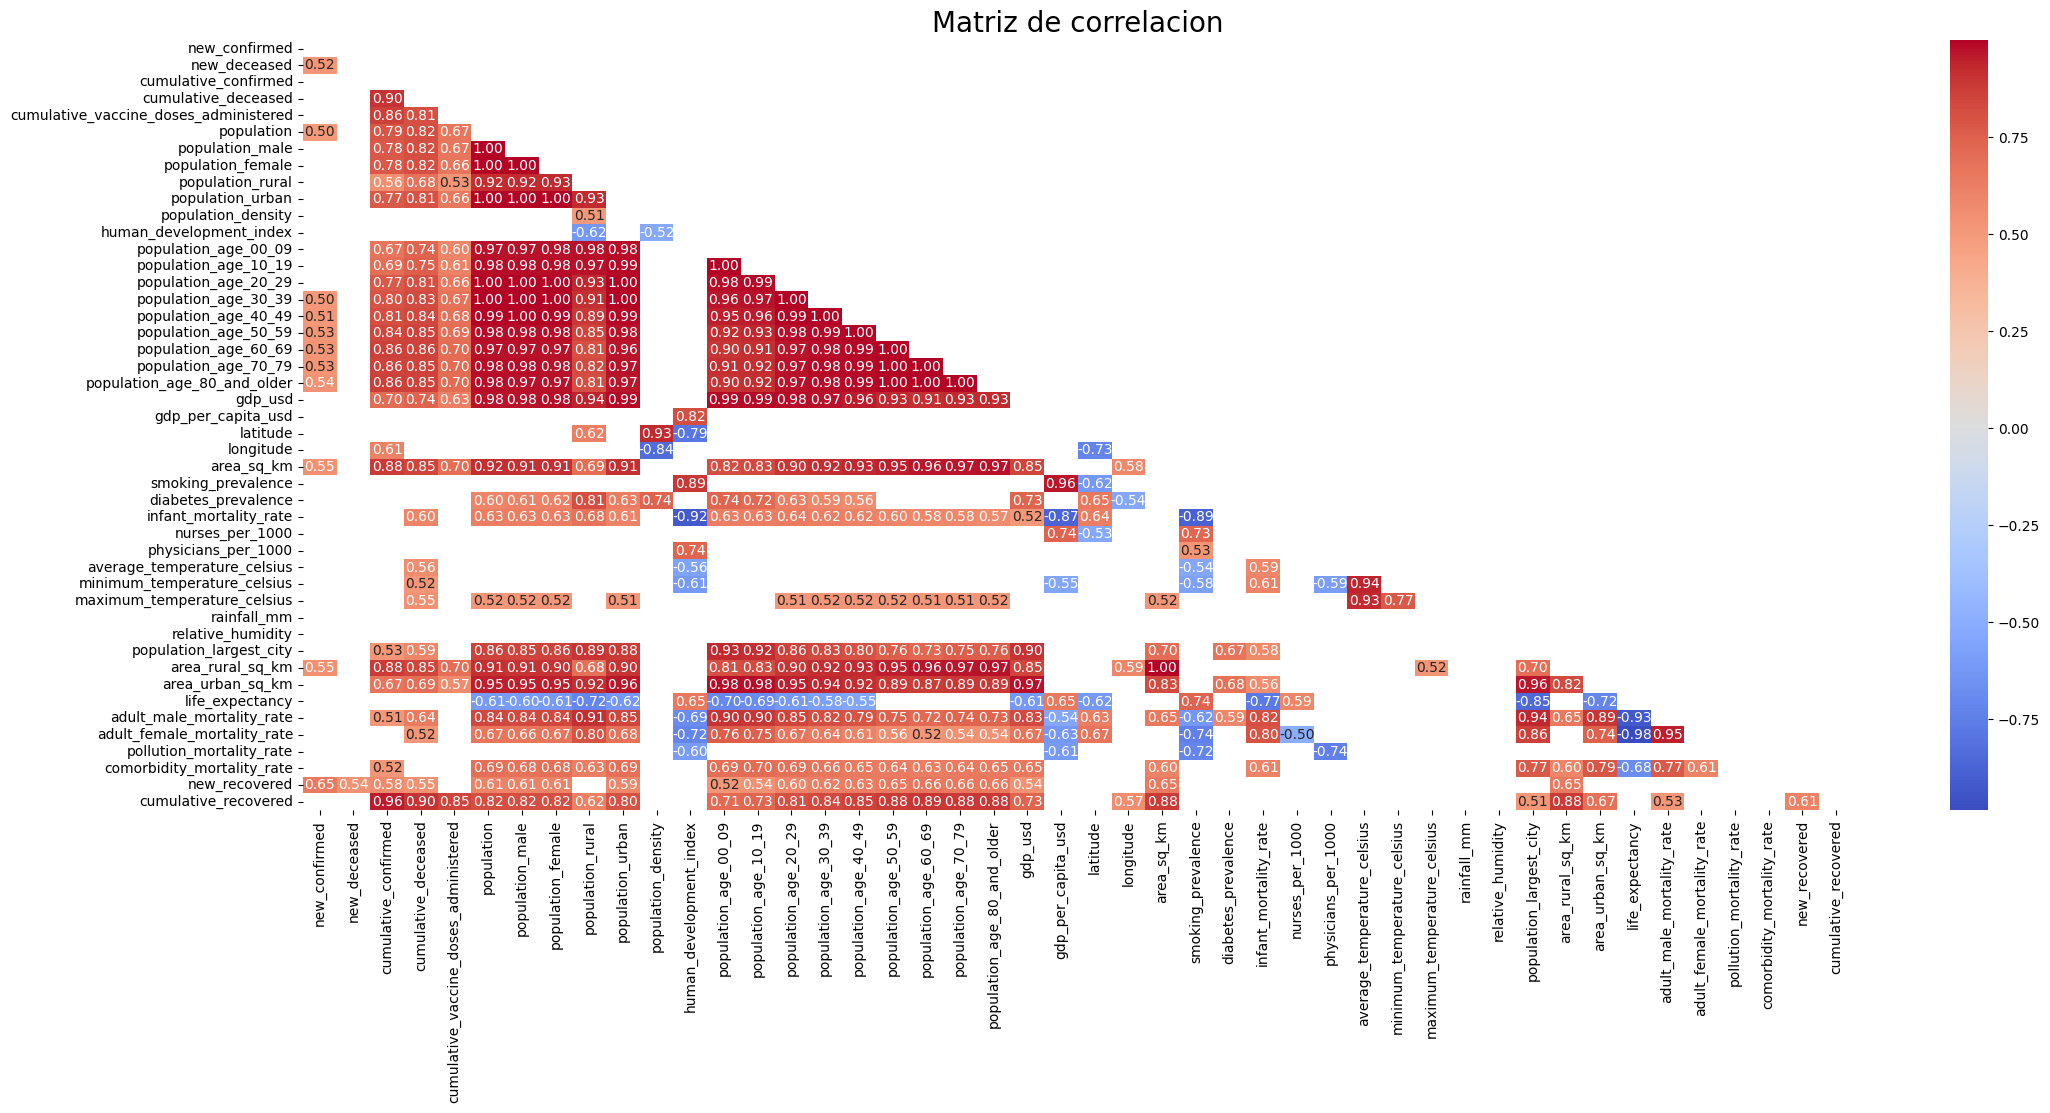

In [118]:
plt.figure(figsize = (25,10))
heatmap = sns.heatmap(correlaion_matrix, mask=mascara, annot= True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlacion", fontsize=20)
plt.show()

Histogramas de las variables que “Sí” tenga cambios de valores

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


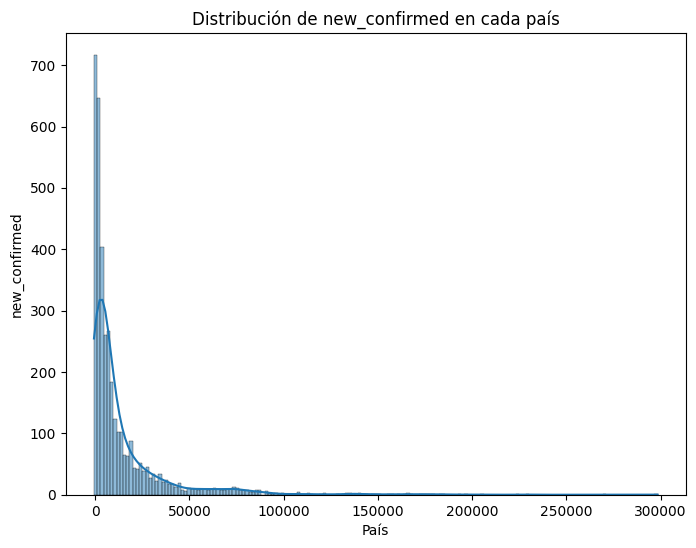

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


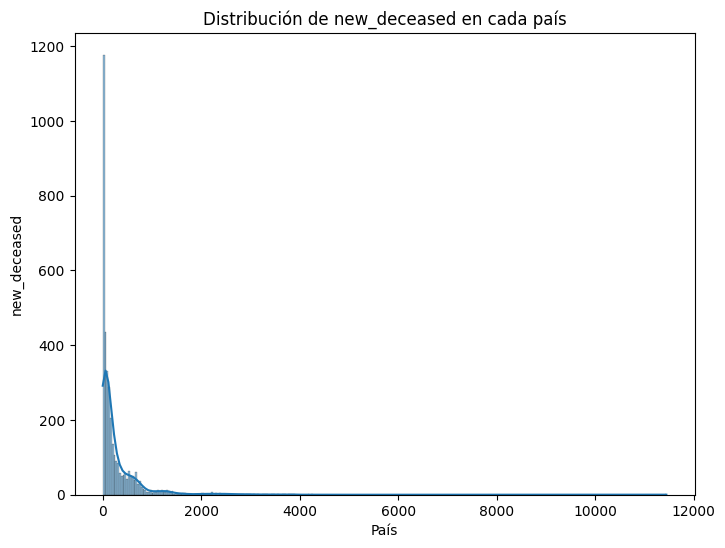

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


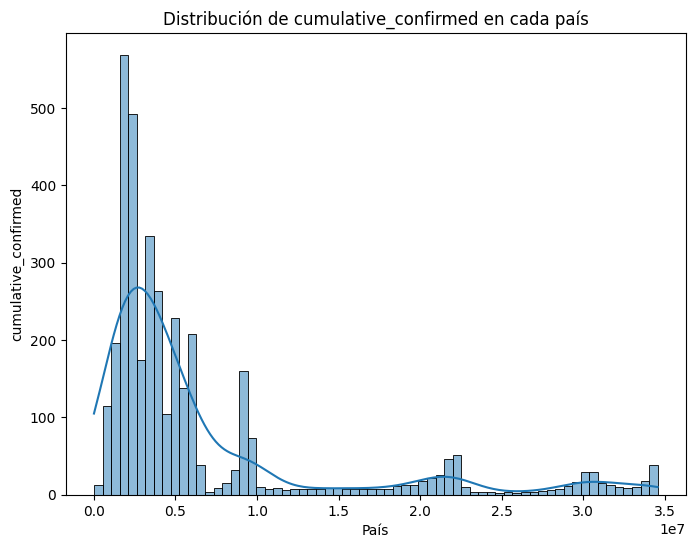

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


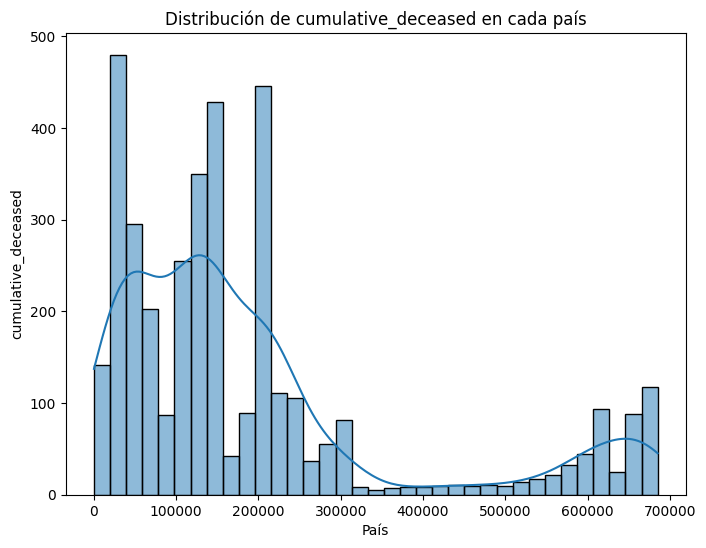

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


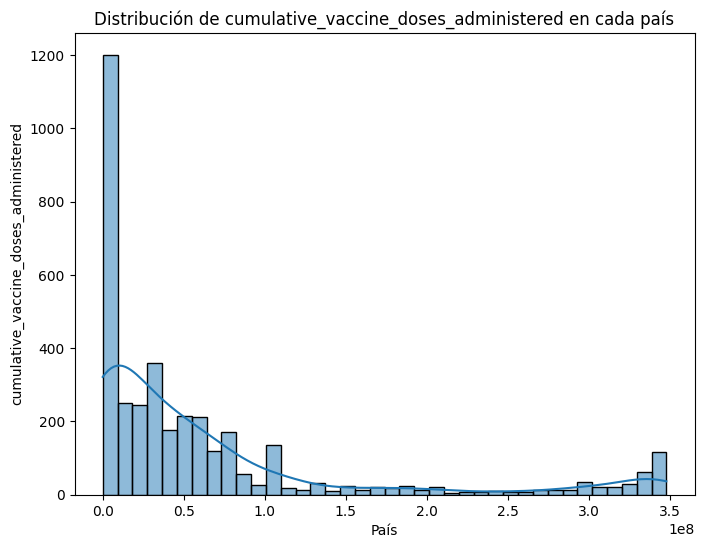

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


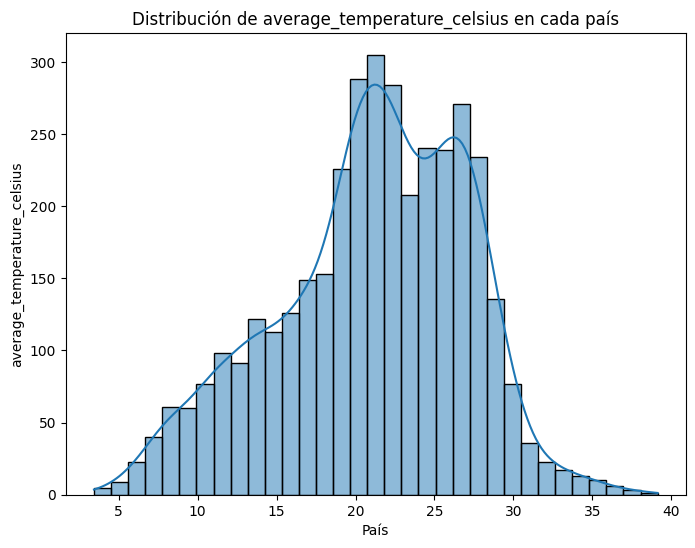

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


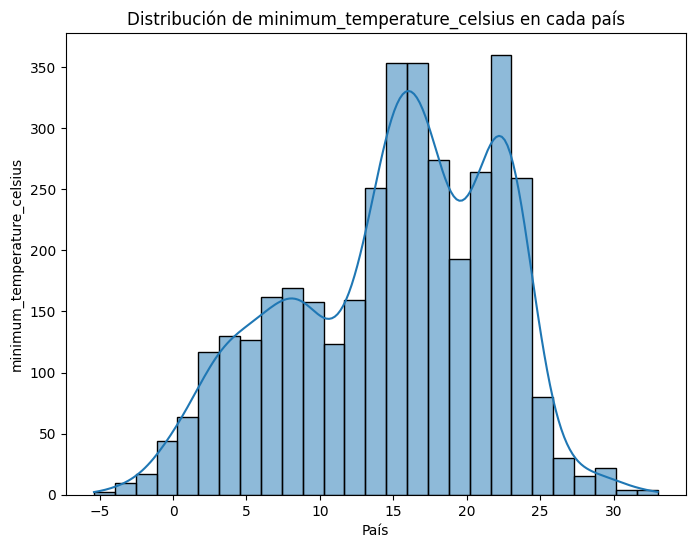

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


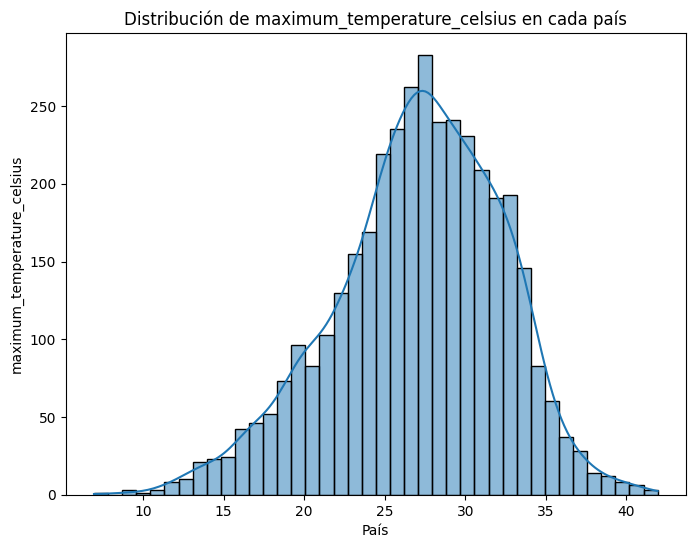

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


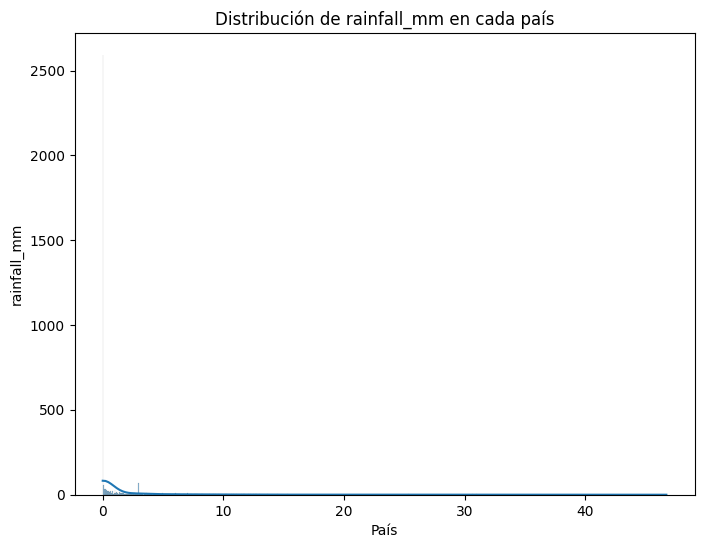

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4027969612.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(datos_finales[columna], kde=True, palette="muted")


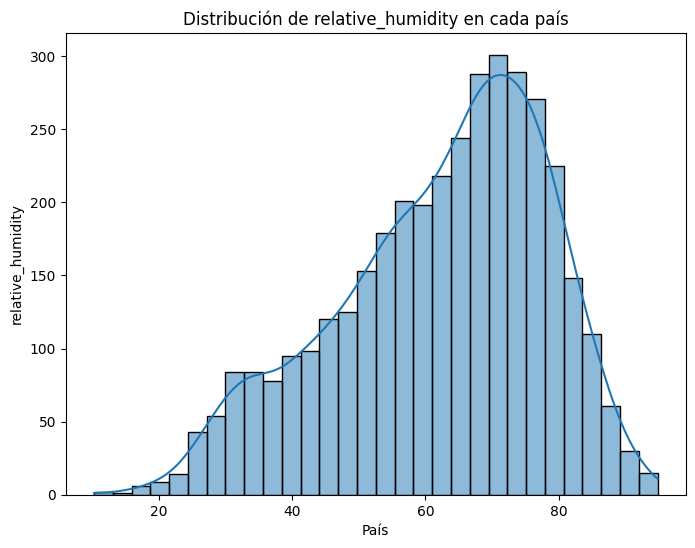

In [119]:
variables = ['new_confirmed', 'new_deceased', 'cumulative_confirmed','cumulative_deceased', 'cumulative_vaccine_doses_administered','average_temperature_celsius'
                       ,'minimum_temperature_celsius', 'maximum_temperature_celsius','rainfall_mm', 'relative_humidity']

# Loop sobre las variables en datos_finales
for columna in datos_finales[variables]:
        # Crear un histograma para la variable actual
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(datos_finales[columna], kde=True, palette="muted")
        
        # Añadir título y etiquetas
        plt.title(f"Distribución de {columna} en cada país")
        plt.xlabel("País")
        plt.ylabel(columna)
        plt.show()


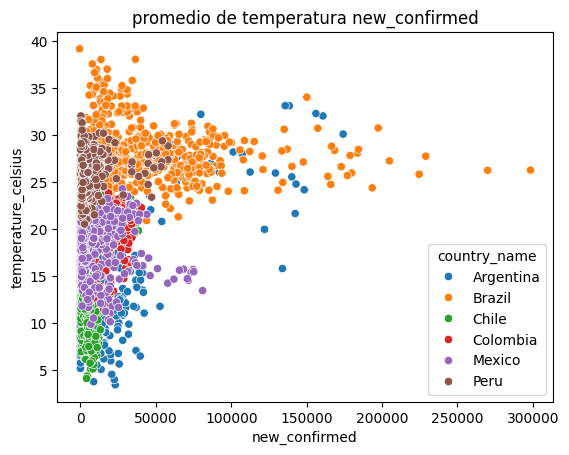

In [120]:


sns.scatterplot(data=datos_finales, x="new_confirmed", y="average_temperature_celsius", hue="country_name")

plt.title( "promedio de temperatura new_confirmed")
plt.xlabel("new_confirmed")
plt.ylabel("temperature_celsius")
plt.show()


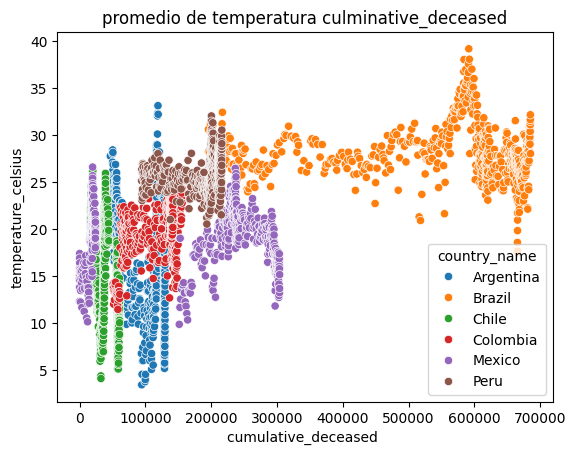

In [121]:
sns.scatterplot(data=datos_finales, x="cumulative_deceased", y="average_temperature_celsius", hue="country_name")

plt.title( "promedio de temperatura culminative_deceased")
plt.xlabel("cumulative_deceased ")
plt.ylabel("temperature_celsius")
plt.show()


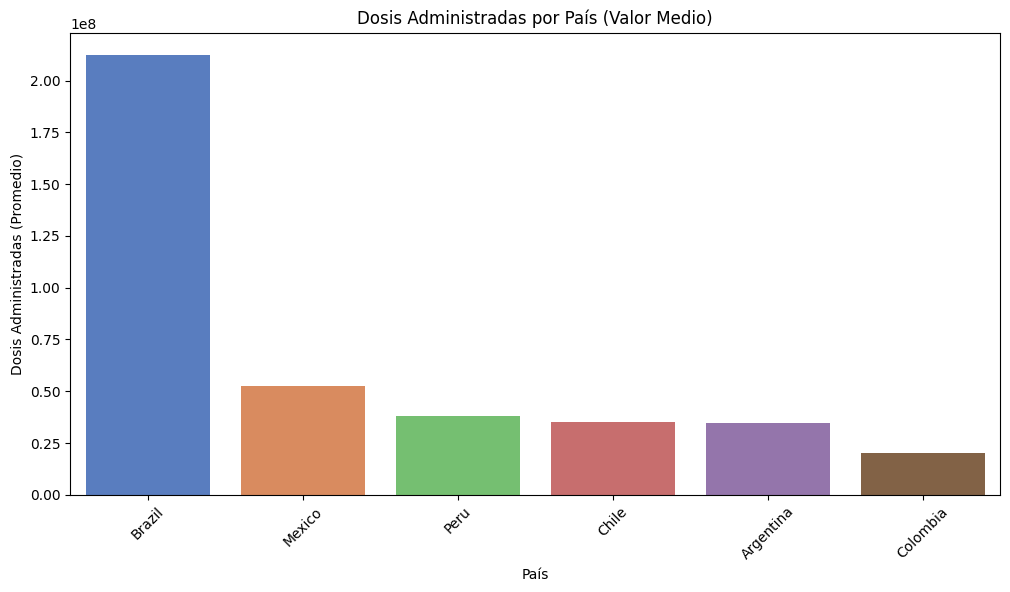

In [122]:

# Calcular el valor medio de las dosis administradas para cada país
mean_doses_per_country = datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].mean()

# Ordenar los valores medios de las datos
mean_doses_per_country = mean_doses_per_country.sort_values(ascending=False).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_doses_per_country, x='country_name', y='cumulative_vaccine_doses_administered', palette="muted", hue="country_name")

# Añadir etiquetas y título
plt.title('Dosis Administradas por País (Valor Medio)')
plt.xlabel('País')
plt.ylabel('Dosis Administradas (Promedio)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

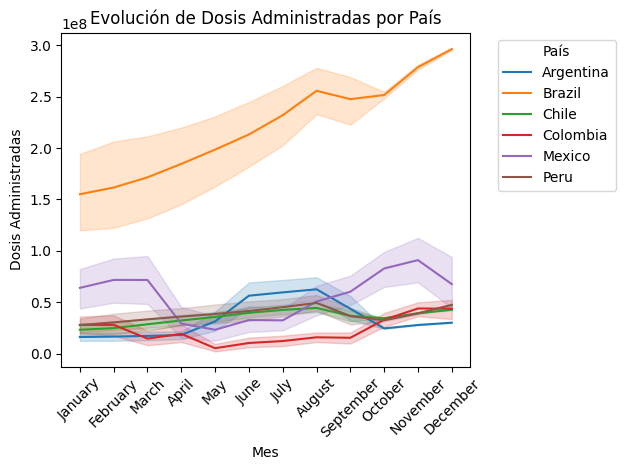

In [123]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")

sns.lineplot(data=datos_finales, x='mes', y='cumulative_vaccine_doses_administered', hue='country_name')


plt.title('Evolución de Dosis Administradas por País')
plt.xlabel('Mes')
plt.ylabel('Dosis Administradas')
plt.xticks(rotation=45)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\1205095422.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=datos_finales, x='mes', y='new_deceased', hue='country_name', ci=None, estimator=sum)


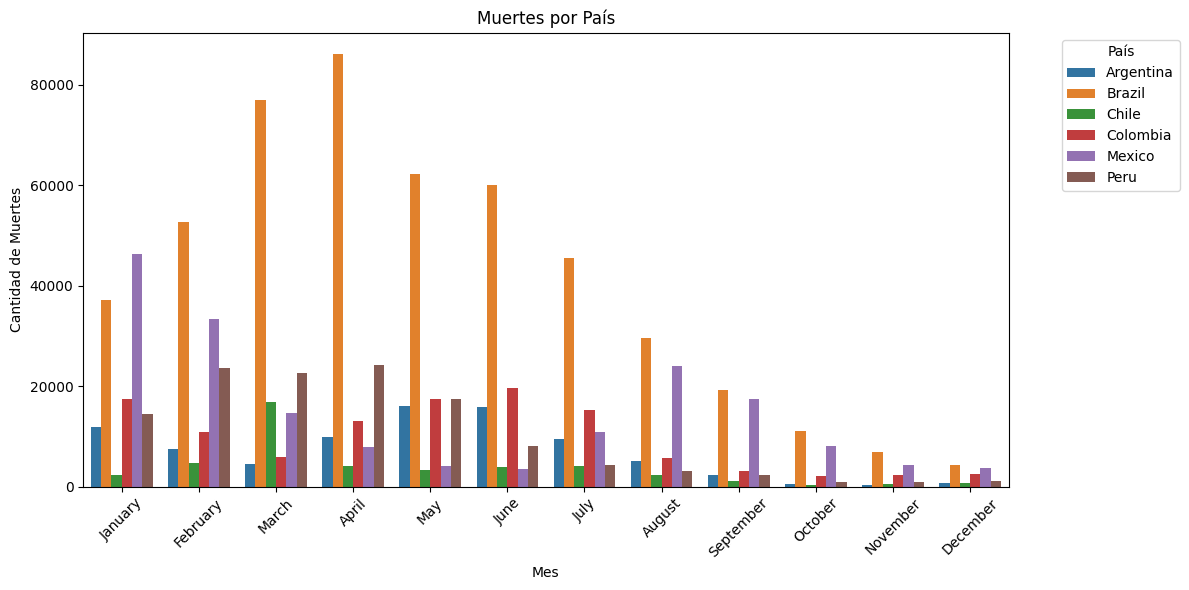

In [124]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")

plt.figure(figsize=(12, 6))
sns.barplot(data=datos_finales, x='mes', y='new_deceased', hue='country_name', ci=None, estimator=sum)

# Añadir etiquetas y título
plt.title('Muertes por País')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Muertes')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar leyenda fuera del gráfico
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\3467582254.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos_finales, x='mes', y='cumulative_confirmed', hue='country_name', ci=None, estimator=sum, lw=2)


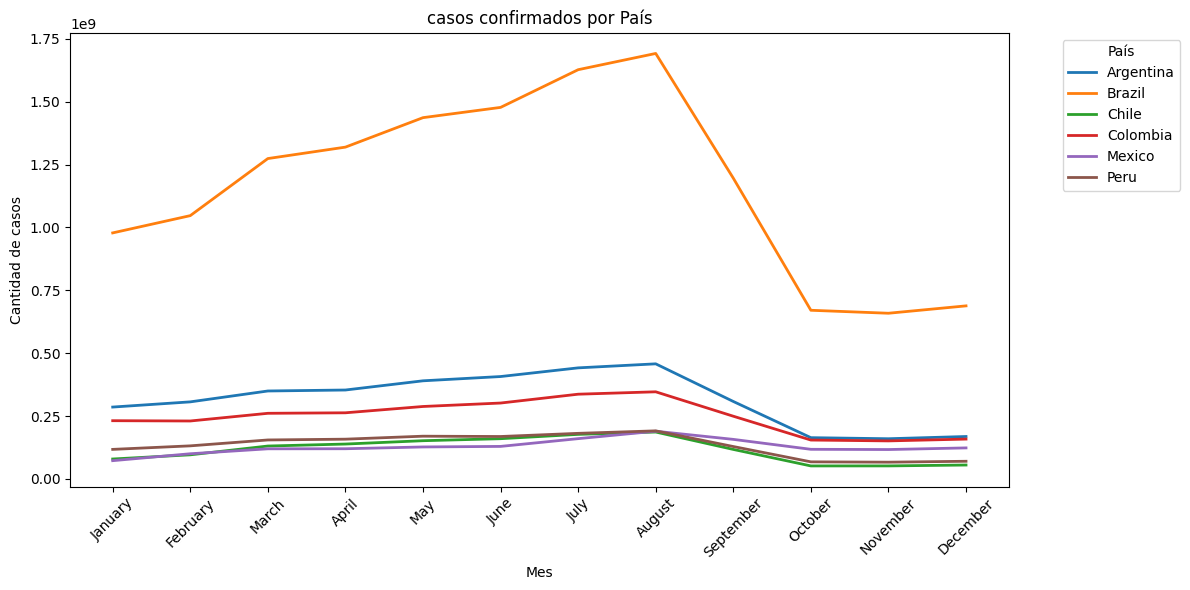

In [125]:
datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")

plt.figure(figsize=(12, 6))
sns.lineplot(data=datos_finales, x='mes', y='cumulative_confirmed', hue='country_name', ci=None, estimator=sum, lw=2)

# Añadir etiquetas y título
plt.title('casos confirmados por País')
plt.xlabel('Mes')
plt.ylabel('Cantidad de casos')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar leyenda fuera del gráfico
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()



C:\Users\julia\AppData\Local\Temp\ipykernel_9088\4274814257.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=datos_finales, x='mes', y='cumulative_recovered', hue='country_name', ci=None, estimator=sum)


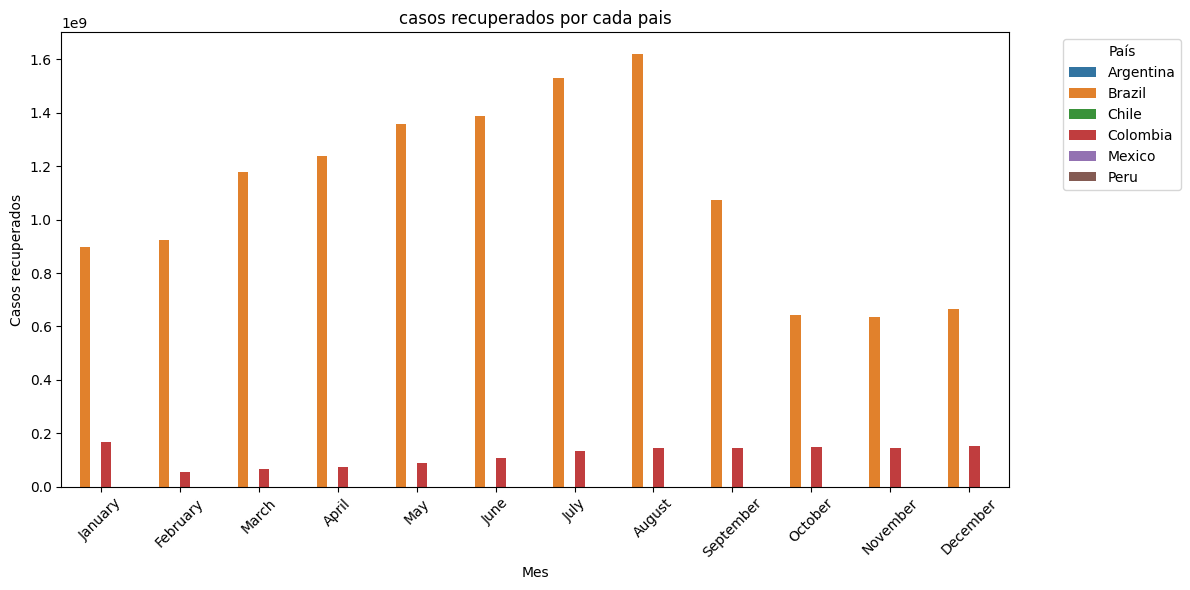

In [126]:


datos_finales.index = pd.to_datetime(datos_finales.index)
datos_finales["mes"] = datos_finales.index.strftime("%B")

plt.figure(figsize=(12, 6))
sns.barplot(data=datos_finales, x='mes', y='cumulative_recovered', hue='country_name', ci=None, estimator=sum)

# Añadir etiquetas y título
plt.title('casos recuperados por cada pais')
plt.xlabel('Mes')
plt.ylabel('Casos recuperados')

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Ajustar leyenda fuera del gráfico
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

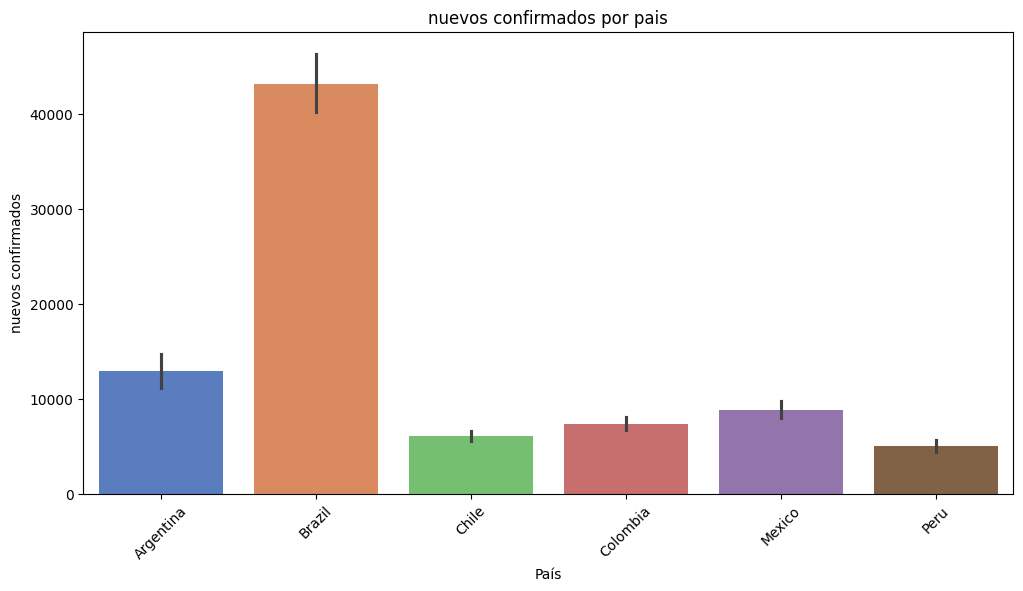

In [127]:
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_finales, x='country_name', y='new_confirmed', palette="muted", hue="country_name")

# Añadir etiquetas y título
plt.title('nuevos confirmados por pais')
plt.xlabel('País')
plt.ylabel('nuevos confirmados')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()

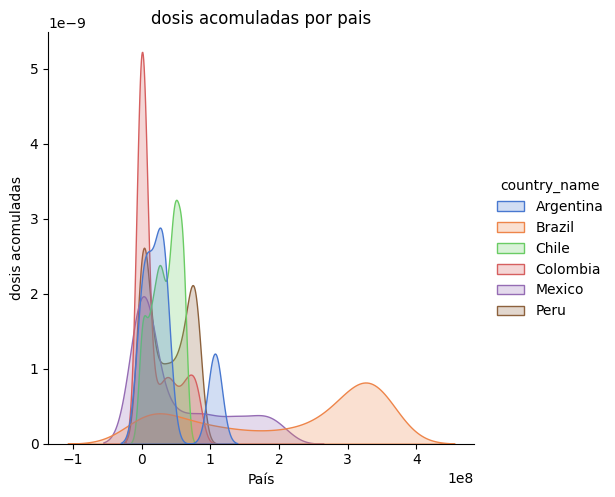

In [128]:

# Mapear los nombres de los meses a números usando el diccionario

sns.displot(data=datos_finales, x='cumulative_vaccine_doses_administered',  palette="muted", hue="country_name", kind="kde", fill=True)

# Añadir etiquetas y título
plt.title('dosis acomuladas por pais')
plt.xlabel('País')
plt.ylabel('dosis acomuladas')

# Mostrar el gráfico
plt.show()

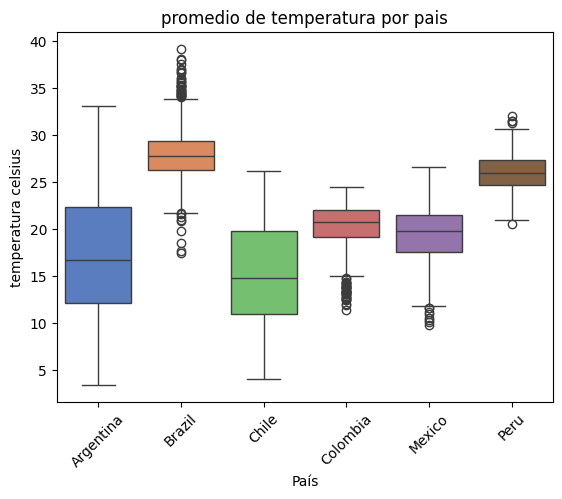

In [129]:
sns.boxplot(data=datos_finales, x="country_name", y = "average_temperature_celsius",hue="country_name",palette="muted")

plt.title('promedio de temperatura por pais')
plt.xlabel('País')
plt.ylabel('temperatura celsius')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.show()


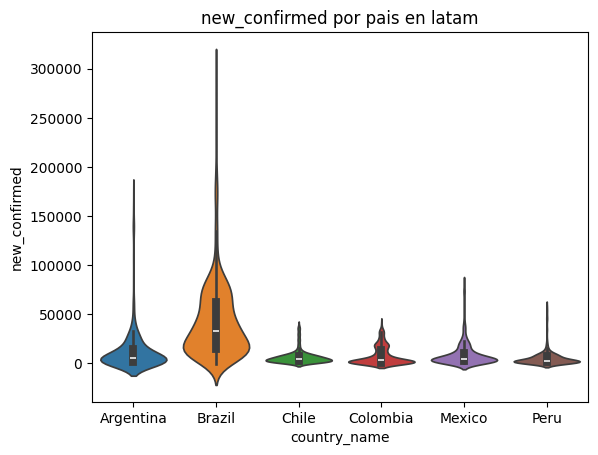

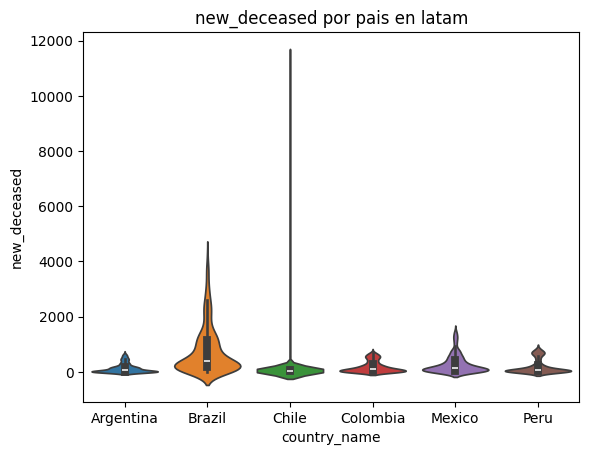

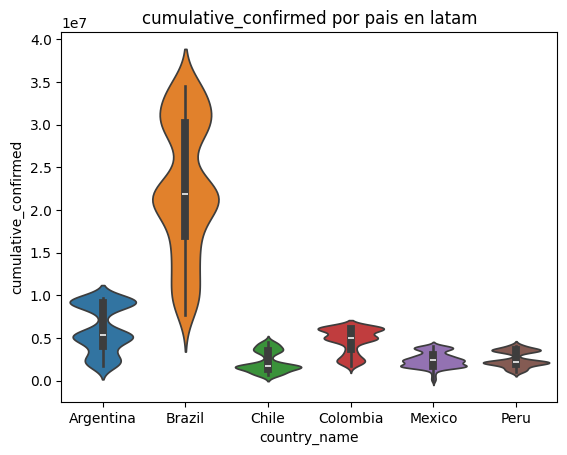

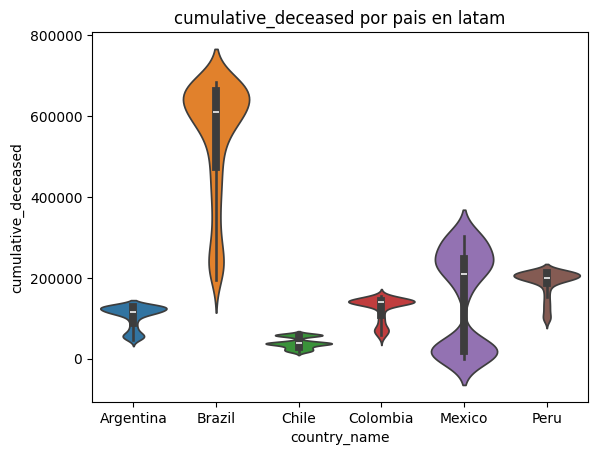

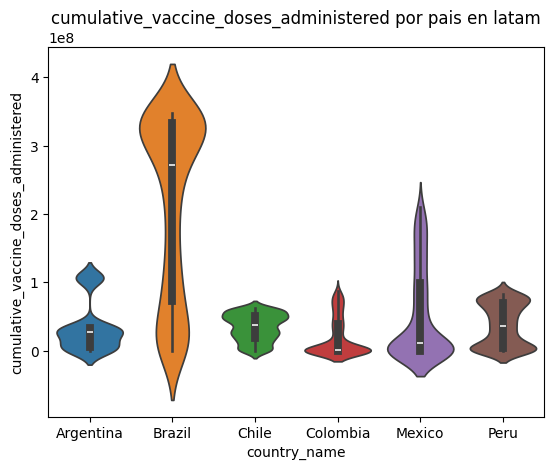

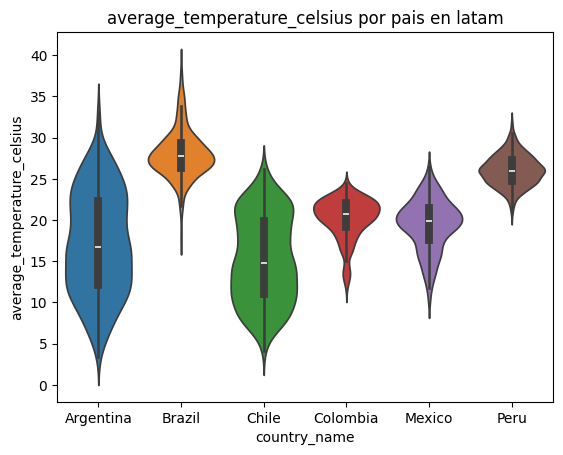

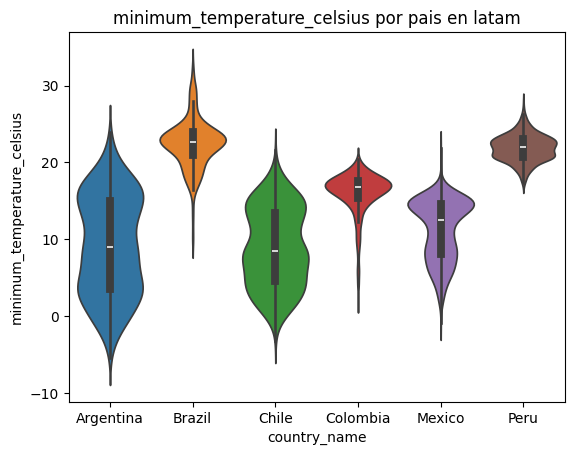

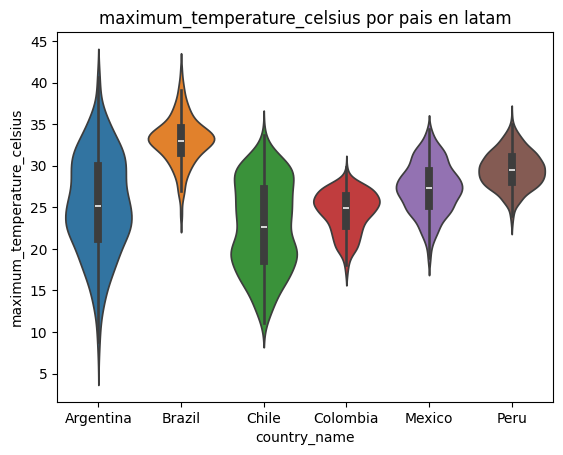

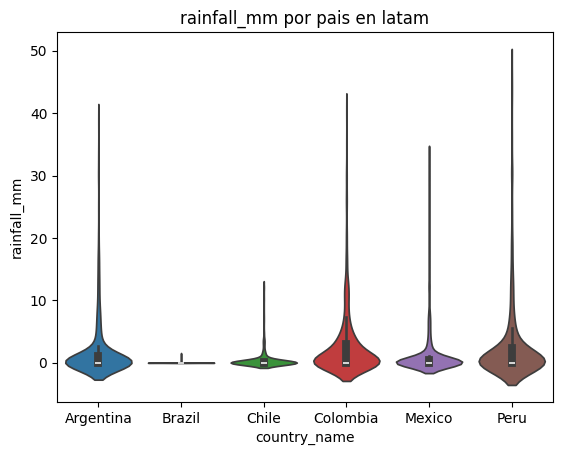

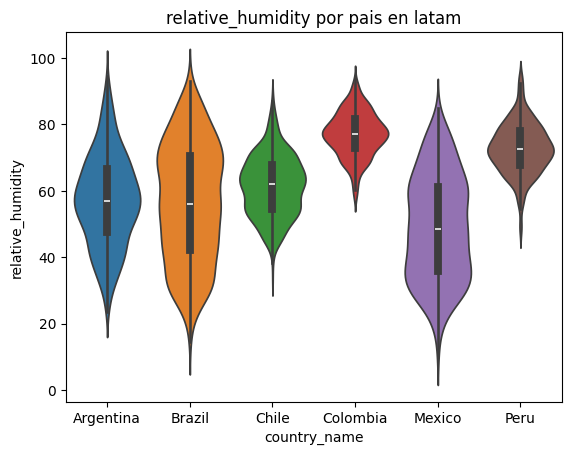

In [130]:
for j in datos_finales:
    if j in  ["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased","cumulative_vaccine_doses_administered",
              "average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","rainfall_mm","relative_humidity"]:
        fig, ax = plt.subplots(figure = (5, 3))
        sns.violinplot(x= "country_name", y = j ,data=datos_finales, ax = ax, hue = "country_name")
        plt.title(f"{j} por pais en latam")
        plt.show()

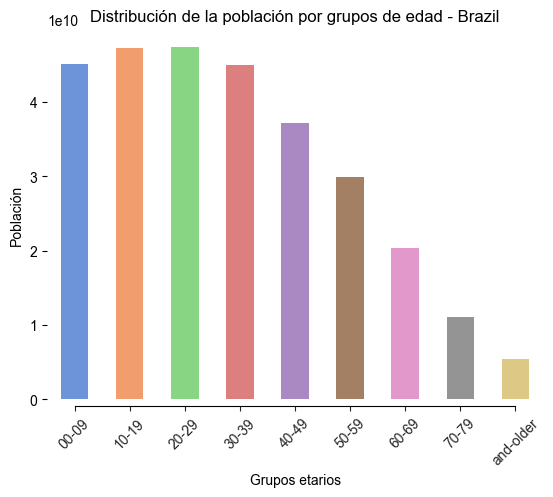

In [131]:
columnas_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
distribucion_edades = datos_finales[columnas_edad].sum()

    # Crear el gráfico de barras
distribucion_edades.plot(kind='bar', stacked=True, alpha=0.8, color=sns.color_palette("muted"))

    # Configuración del gráfico
plt.title(f'Distribución de la población por grupos de edad - {pais}')
plt.xlabel('Grupos etarios')
plt.ylabel('Población')
sns.set_style('darkgrid')
sns.despine(left=True, offset=5, trim=True)

plt.xticks(range(len(columnas_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in columnas_edad], rotation=45)
  
    # Mostrar el gráfico
plt.show()

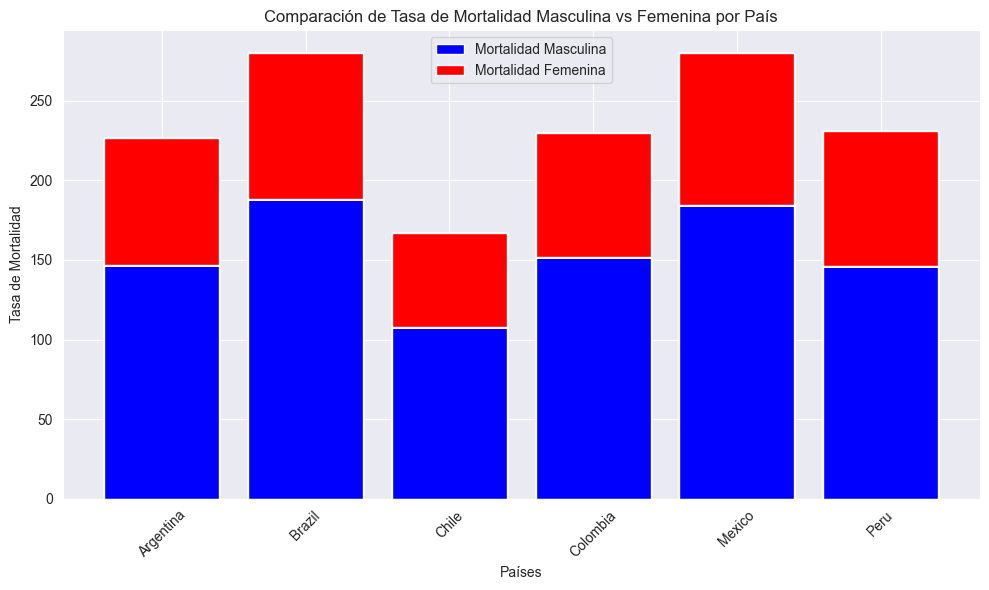

In [132]:
plt.figure(figsize=(10, 6))
plt.bar((datos_finales["country_name"]), (datos_finales["adult_male_mortality_rate"]), label='Mortalidad Masculina', color='blue')
plt.bar((datos_finales["country_name"]), (datos_finales["adult_female_mortality_rate"]), bottom=(datos_finales["adult_male_mortality_rate"]), label='Mortalidad Femenina', color='red')

# Personalizar el gráfico
plt.xlabel('Países')
plt.ylabel('Tasa de Mortalidad')
plt.title('Comparación de Tasa de Mortalidad Masculina vs Femenina por País')
plt.legend()

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


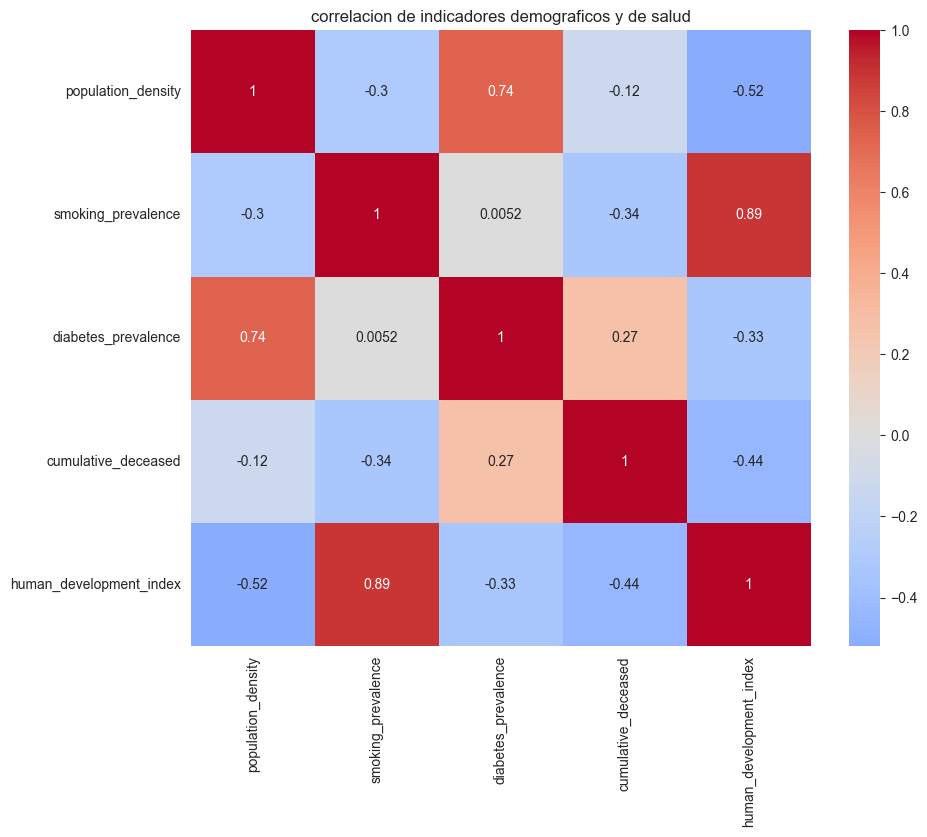

In [133]:
valores = ["population_density", "smoking_prevalence", "diabetes_prevalence", "cumulative_deceased","human_development_index"]
correlaion_m = datos_finales[valores].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlaion_m, annot=True, cmap="coolwarm", center=0)
plt.title("correlacion de indicadores demograficos y de salud")
plt.show()

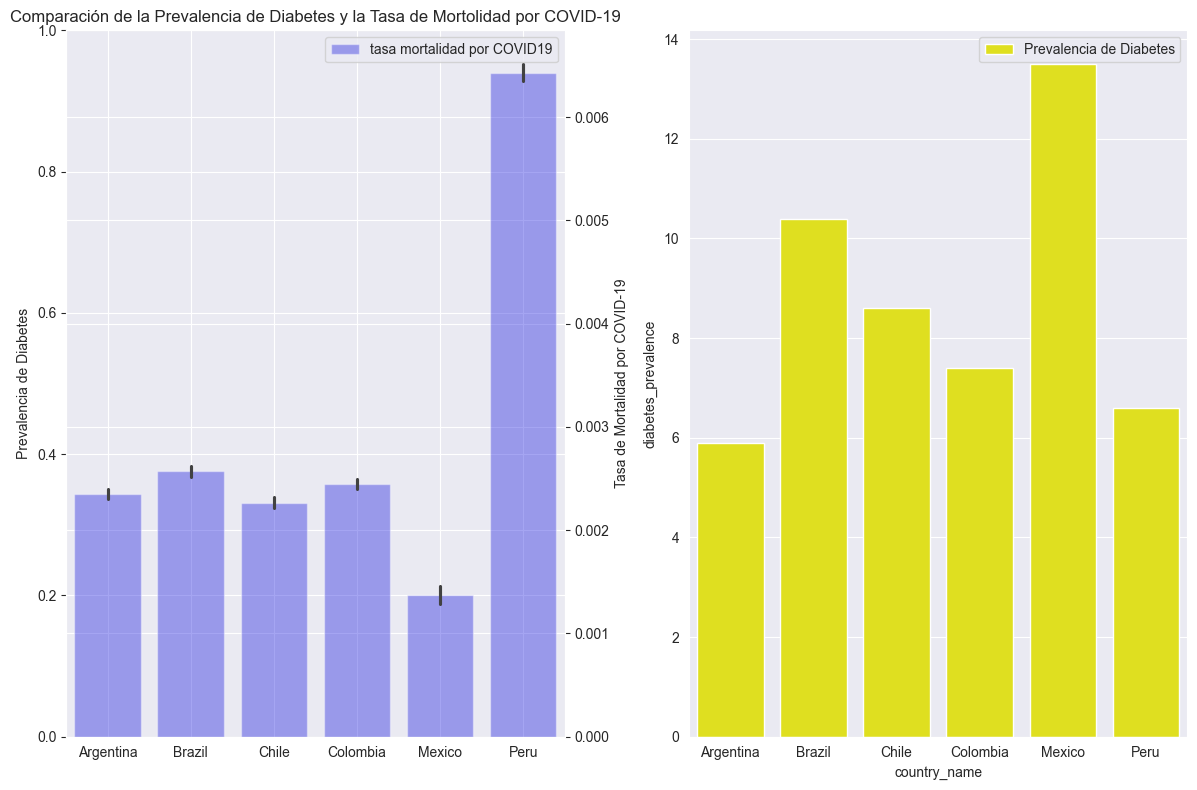

In [134]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=datos_finales, x=datos_finales["country_name"], y = datos_finales["diabetes_prevalence"], color="yellow", label="Prevalencia de Diabetes")
ax2 = ax.twinx()
sns.barplot(data=datos_finales, x= datos_finales ["country_name"], y= datos_finales["cumulative_deceased"] / datos_finales['population'], color=("blue"), label="tasa mortalidad por COVID19", ax=ax2,alpha=0.4 )

plt.xticks(rotation=90)

ax.set_ylabel("Prevalencia de Diabetes")

ax2.set_ylabel("Tasa de Mortalidad por COVID-19")

plt.title("Comparación de la Prevalencia de Diabetes y la Tasa de Mortolidad por COVID-19")
plt.tight_layout()
plt.show()

### AVANCE 3


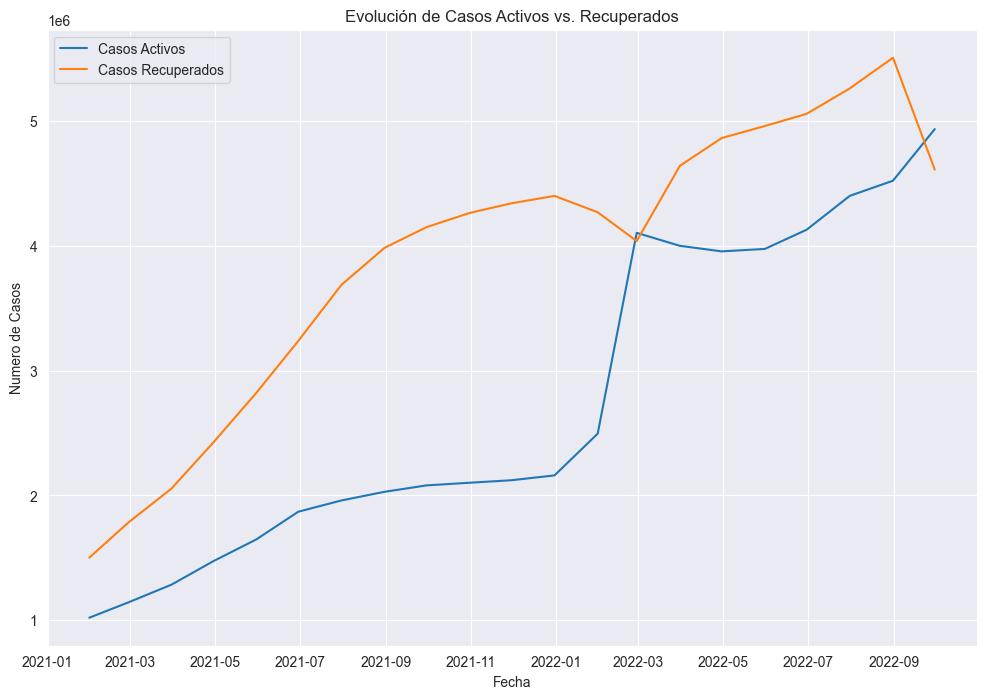

In [135]:
datos_finales["active_cases"] = datos_finales["cumulative_confirmed"] - datos_finales["cumulative_deceased"] - datos_finales["cumulative_recovered"]
# Mapear los nombres de los meses a números usando el diccionario
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True), x="date", y ="active_cases" , label="Casos Activos")
sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True), x="date", y = "cumulative_recovered",label="Casos Recuperados")

#sns.displot(data=datos_finales, x='cumulative_vaccine_doses_administered',  palette="muted", hue="country_name", kind="kde", fill=True)

# Añadir etiquetas y título
plt.title('Evolución de Casos Activos vs. Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')

# Mostrar el gráfico
plt.show()

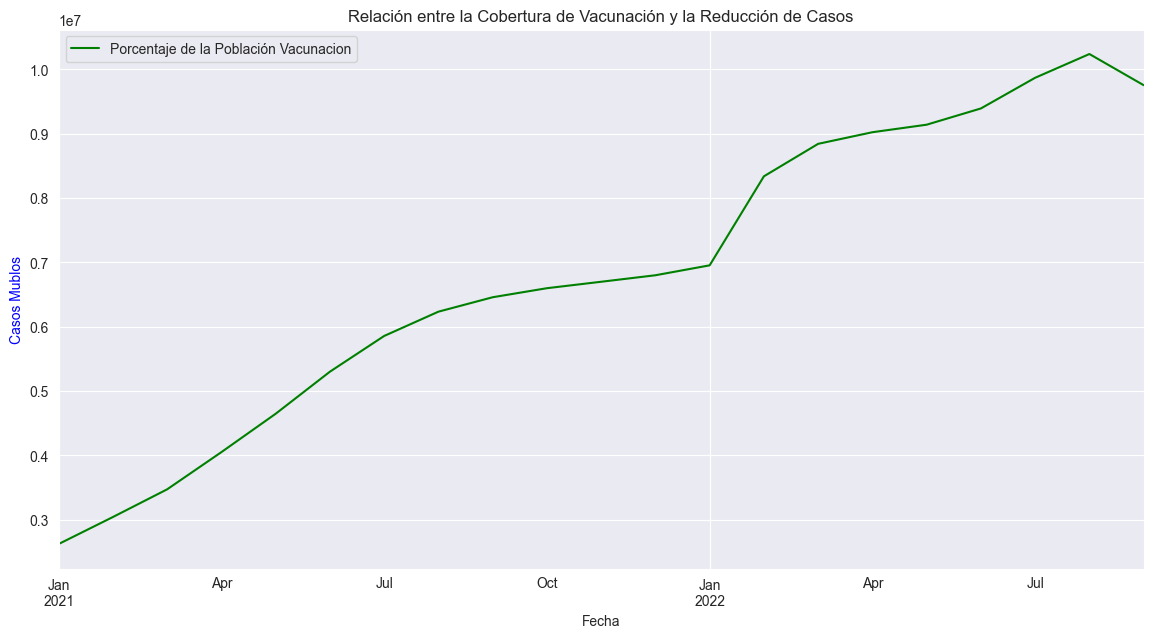

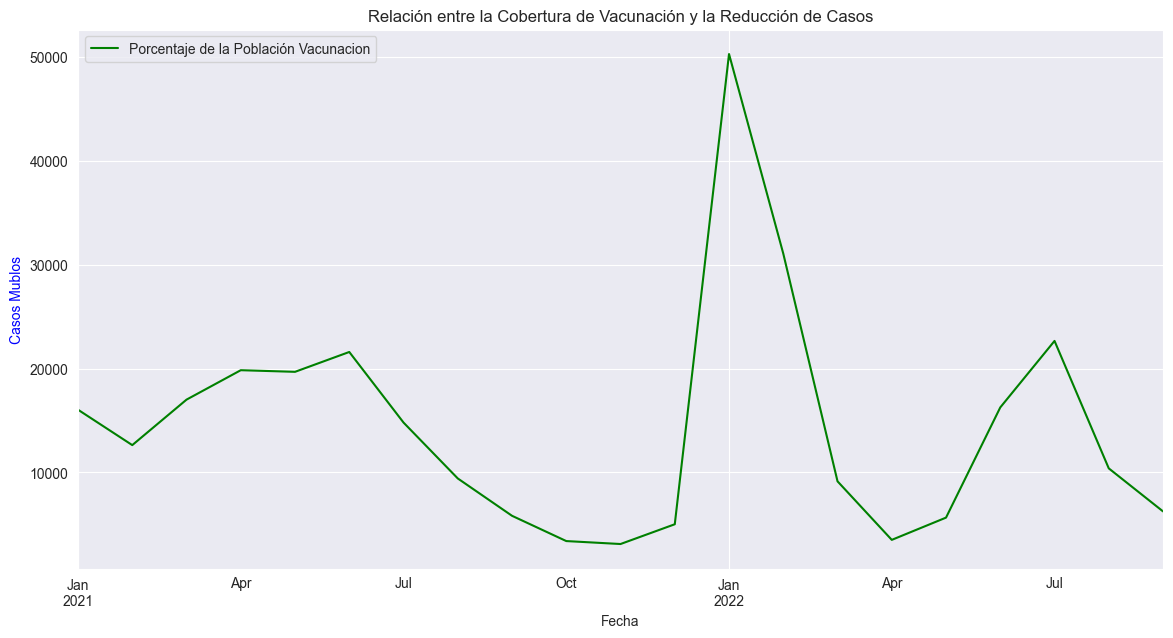

In [136]:
plt.figure(figsize=(14, 7))

ax1 = plt.gca()


#crea percentajes de vacunación
datos_finales["percentage_growth"] = datos_finales["cumulative_confirmed"] - datos_finales["cumulative_confirmed"] / datos_finales["cumulative_confirmed"]*100
datos_finales.resample('ME').mean(numeric_only=True)["percentage_growth"].plot(ax=ax1, color="green", label="Porcentaje de la Población Vacunacion")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Mublos", color="blue")
#ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

plt.show()


plt.figure(figsize=(14, 7))

ax1 = plt.gca()


#crea percentajes de vacunación
datos_finales["percentage_growth"] = datos_finales["new_confirmed"] - datos_finales["new_confirmed"] / datos_finales["new_confirmed"]*100
datos_finales.resample('ME').mean(numeric_only=True)["percentage_growth"].plot(ax=ax1, color="green", label="Porcentaje de la Población Vacunacion")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Mublos", color="blue")
#ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

plt.show()

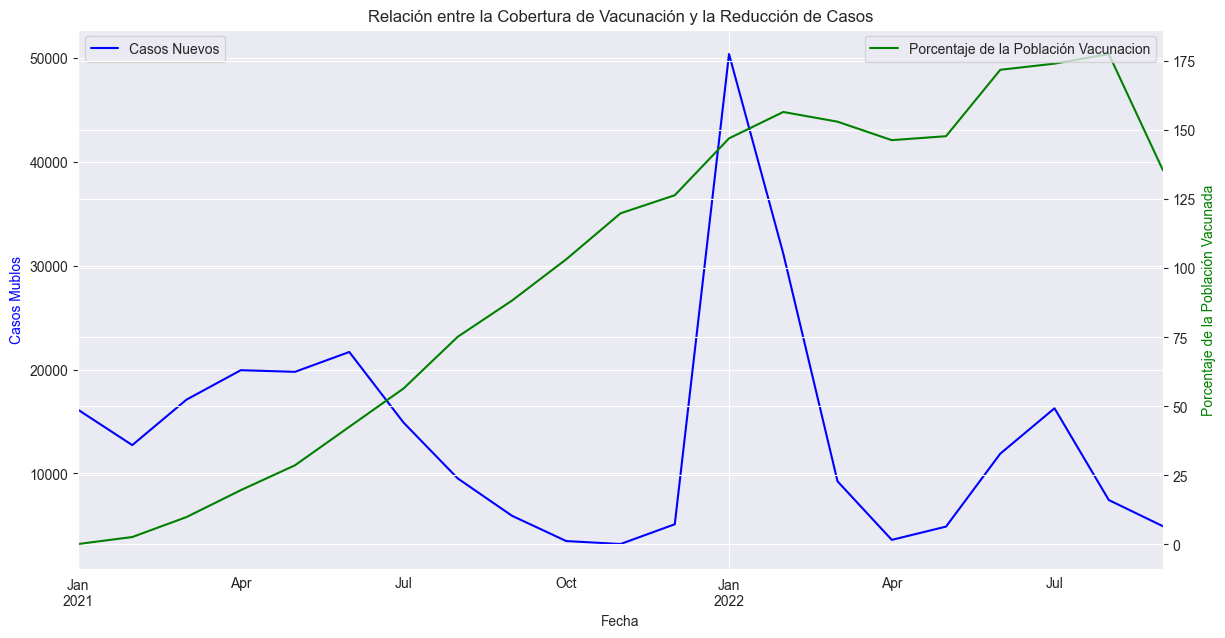

In [138]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))

ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunación
datos_finales["percentage_vaccinated"] = datos_finales["cumulative_vaccine_doses_administered"] / datos_finales["population"]*100
datos_finales.resample('ME').mean(numeric_only=True)["new_confirmed"].plot(ax=ax1, color="blue", label="Casos Nuevos")
datos_finales.resample('ME').mean(numeric_only=True)["percentage_vaccinated"].plot(ax=ax2, color="green", label="Porcentaje de la Población Vacunacion")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Mublos", color="blue")
ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()



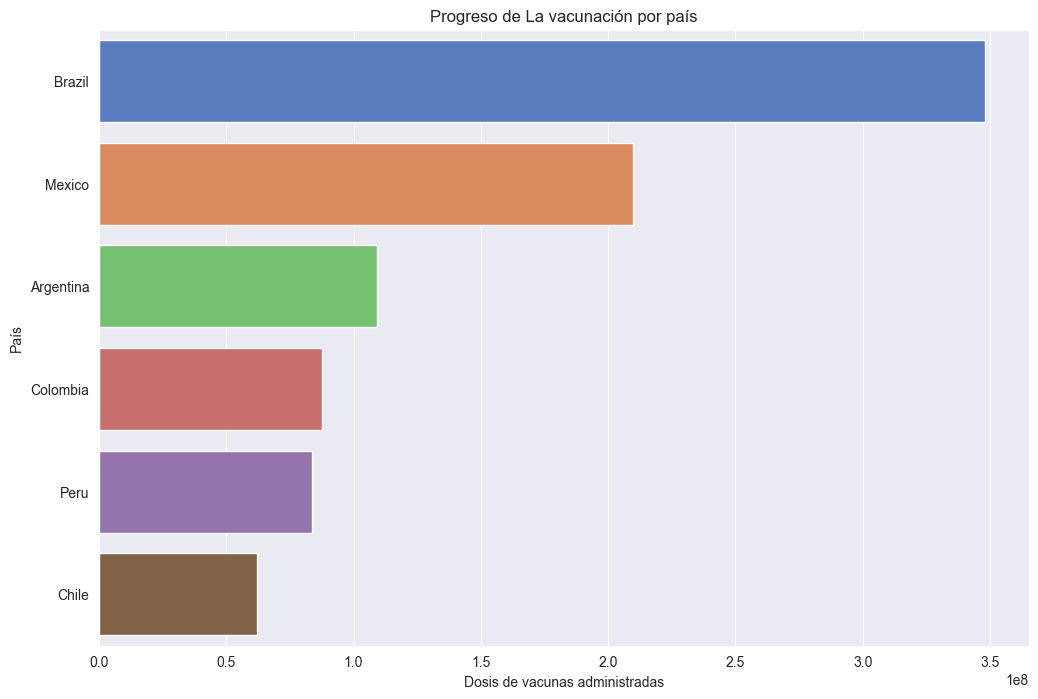

In [139]:
vaccination_data = datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette="muted")
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')

plt.title('Progreso de La vacunación por país')

plt.show()

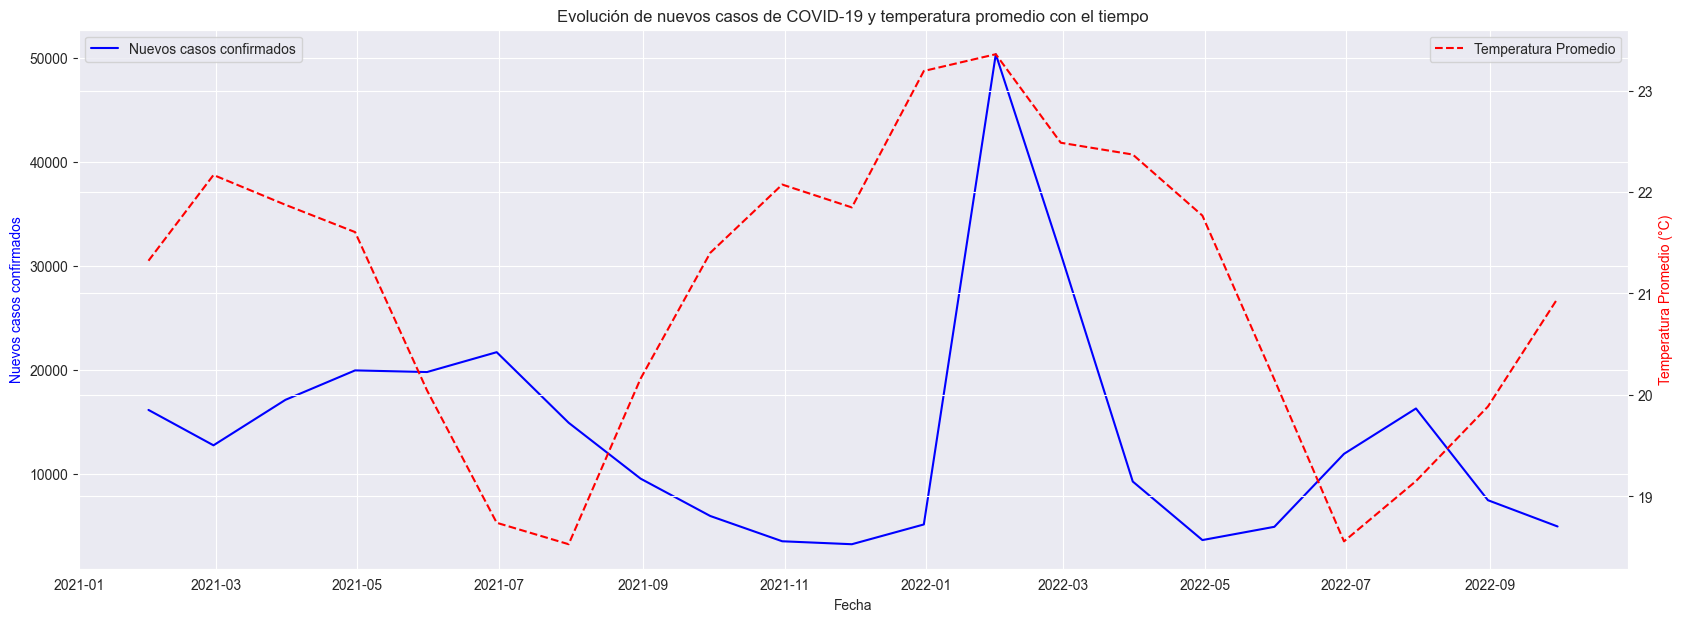

In [140]:
plt.figure(figsize=(20, 7))

# Crear dos ejes y vincularlos
ax1 = plt.gca()
ax2 = ax1.twinx()

# Graficar los datos en cada eje
ax1.plot(datos_finales.resample('ME').mean(numeric_only=True).index, datos_finales.resample('ME').mean(numeric_only=True)['new_confirmed'], color="blue", label='Nuevos casos confirmados')
ax2.plot(datos_finales.resample('ME').mean(numeric_only=True).index, datos_finales.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='red', label='Temperatura Promedio', linestyle='--')

# Configurar etiquetas y título
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='blue')
ax2.set_ylabel('Temperatura Promedio (°C)', color='red')
plt.title('Evolución de nuevos casos de COVID-19 y temperatura promedio con el tiempo')

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_9088\3419929443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='muted')


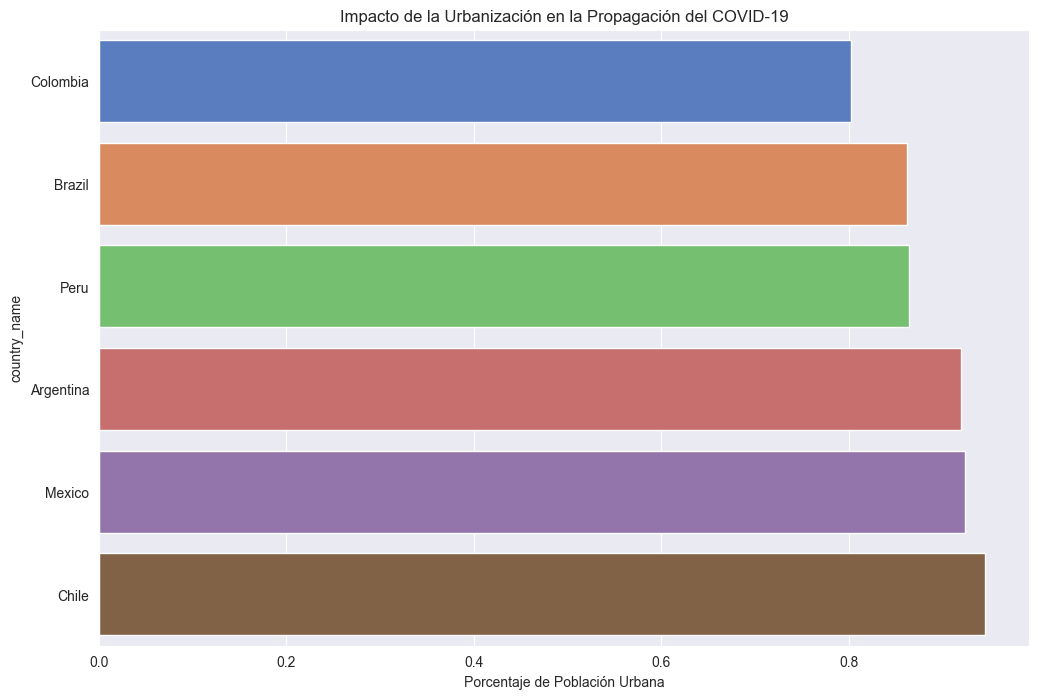

In [141]:
datos_finales['urban_population_percentage'] = datos_finales['population_urban'] / datos_finales['population']
urban_cases = datos_finales.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='muted')
plt.xlabel('Porcentaje de Población Urbana')

plt.title('Impacto de la Urbanización en la Propagación del COVID-19')
plt.show()

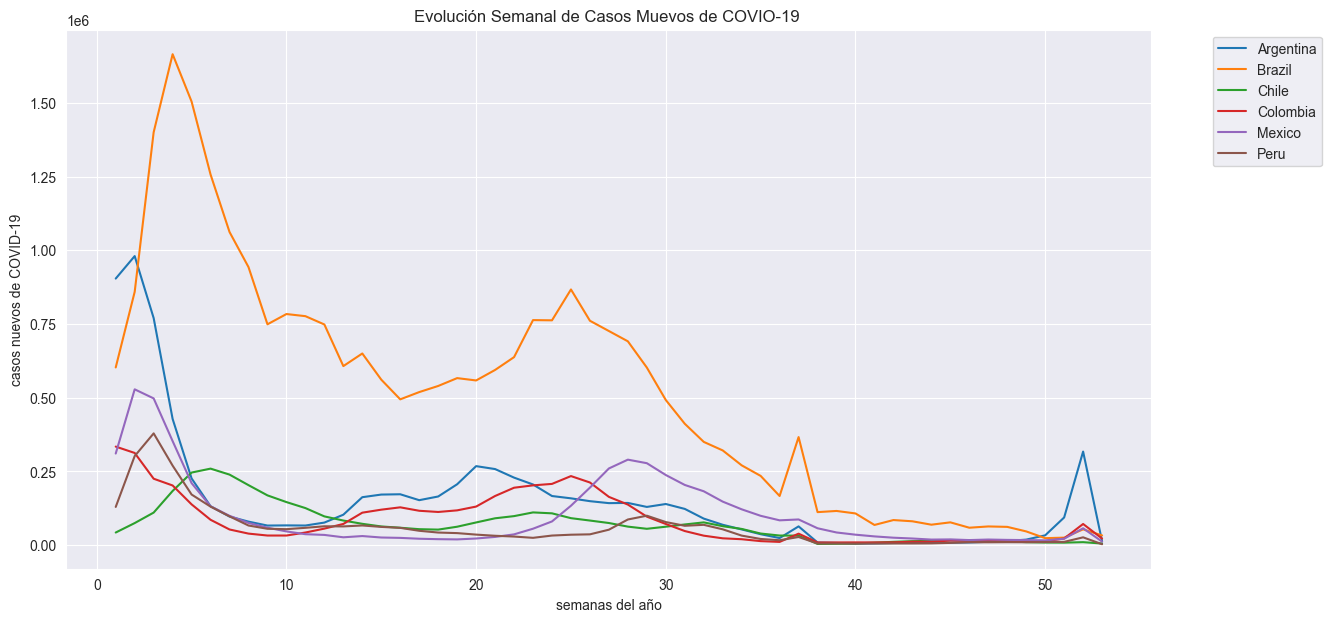

In [142]:


datos_finales['week'] = datos_finales.index.isocalendar().week
weekly_cases = datos_finales.groupby(['country_name', "week"]) ['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in weekly_cases["country_name"].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases["new_confirmed"], label=country)

# Añadir etiquetas y título
plt.title("Evolución Semanal de Casos Muevos de COVIO-19 ")
plt.xlabel('semanas del año')
plt.ylabel('casos nuevos de COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar el gráfico
plt.show()

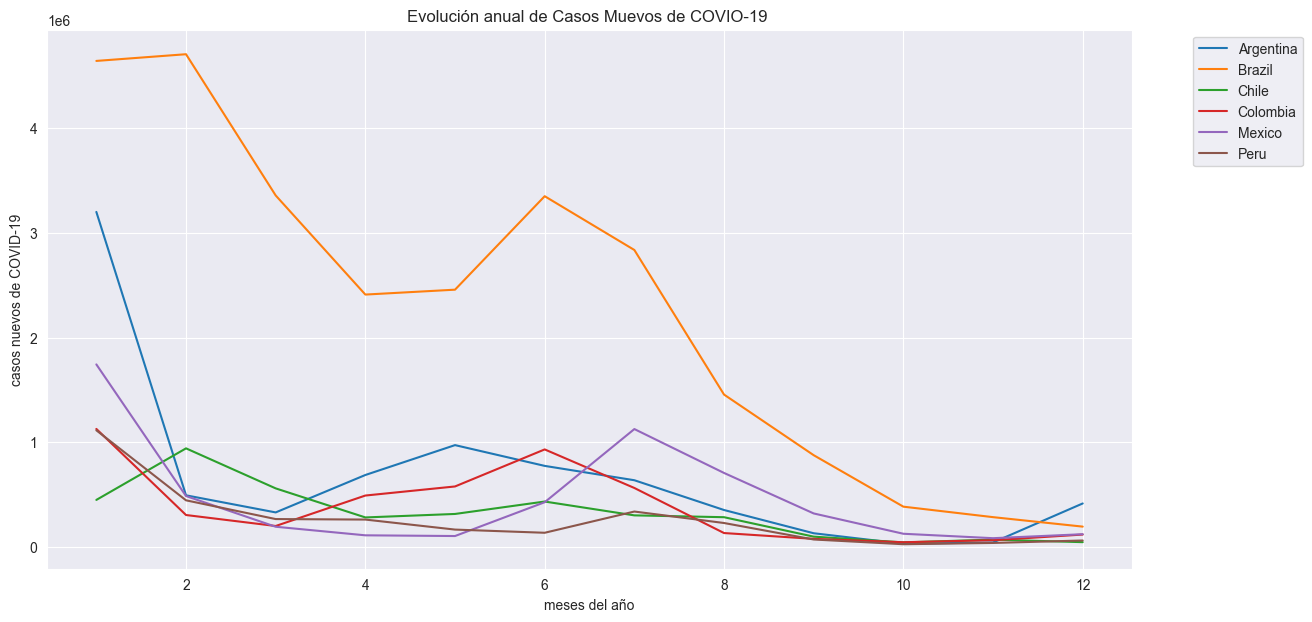

In [143]:
datos_finales['month'] = datos_finales.index.month
yearly_cases = datos_finales.groupby(['country_name', "month"]) ['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases["new_confirmed"], label=country)

# Añadir etiquetas y título
plt.title("Evolución anual de Casos Muevos de COVIO-19 ")
plt.xlabel('meses del año')
plt.ylabel('casos nuevos de COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar el gráfico
plt.show()

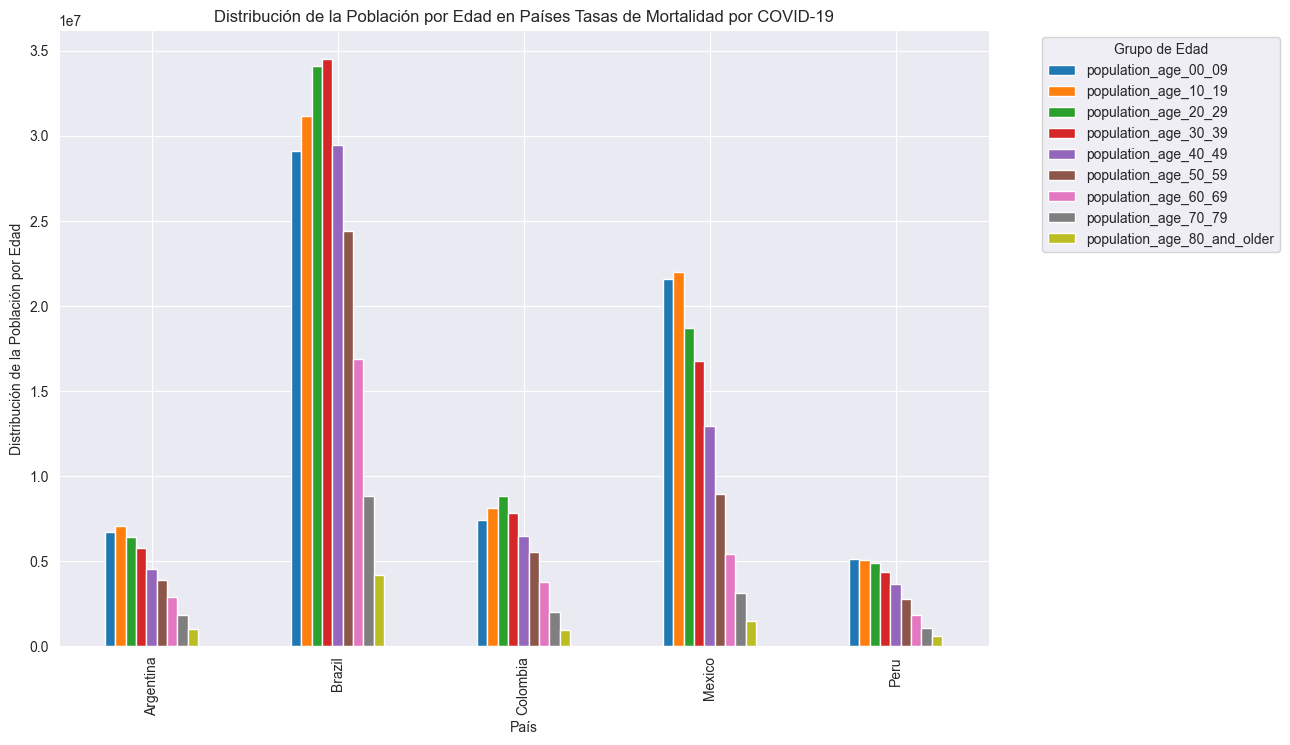

In [144]:
high_mortality_countries = datos_finales.groupby( 'country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution = datos_finales[datos_finales['country_name'].isin(high_mortality_countries)].groupby('country_name') [age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')

plt.ylabel('Distribución de la Población por Edad')

plt.title('Distribución de la Población por Edad en Países Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Grupo de Edad')

plt.show()


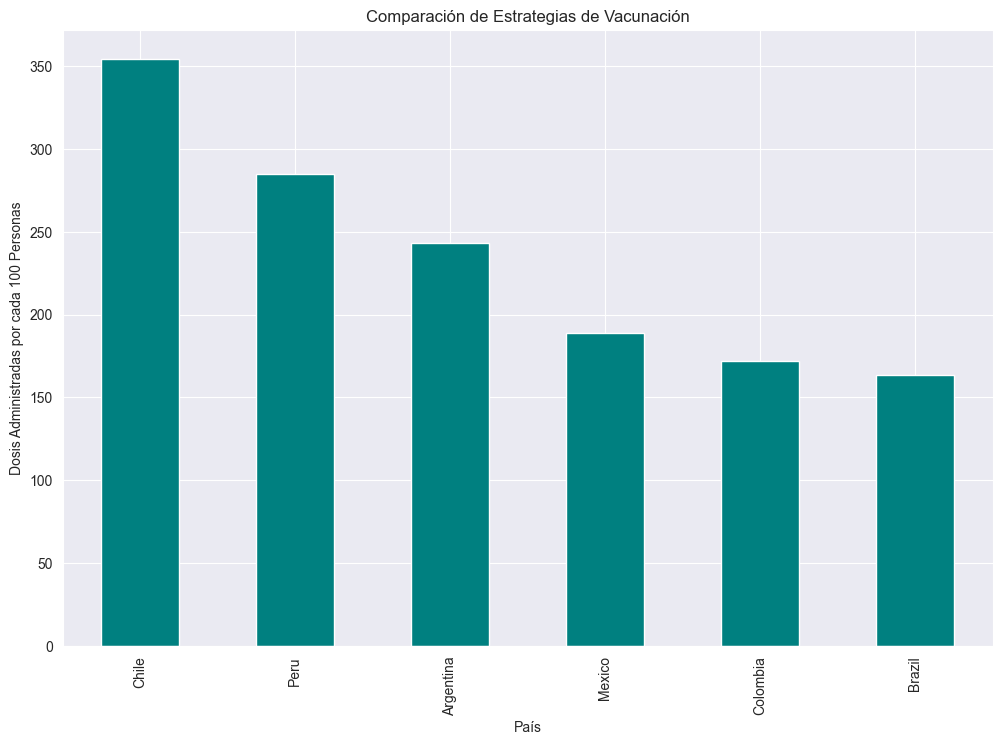

In [145]:
vaccination_strategy = datos_finales.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / datos_finales.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')

plt.xlabel( 'País')

plt.ylabel('Dosis Administradas por cada 100 Personas')

plt.title('Comparación de Estrategias de Vacunación')

plt.show()



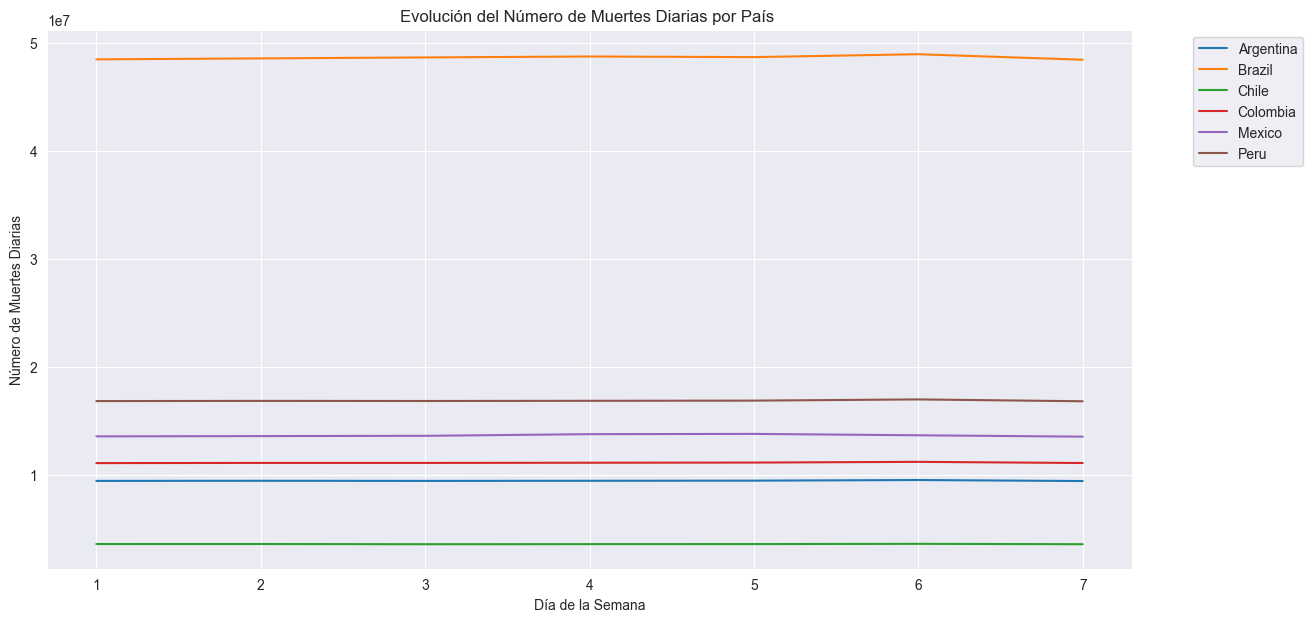

In [146]:
datos_finales['day'] = datos_finales.index.isocalendar().day
day_cases = datos_finales.groupby(['country_name', "day"]) ['cumulative_deceased'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in day_cases["country_name"].unique():
    country_day_cases = day_cases[day_cases['country_name'] == country]
    plt.plot(country_day_cases['day'], country_day_cases["cumulative_deceased"], label=country)

# Añadir etiquetas y título
plt.title("Evolución del Número de Muertes Diarias por País ")
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Muertes Diarias')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar el gráfico
plt.show()

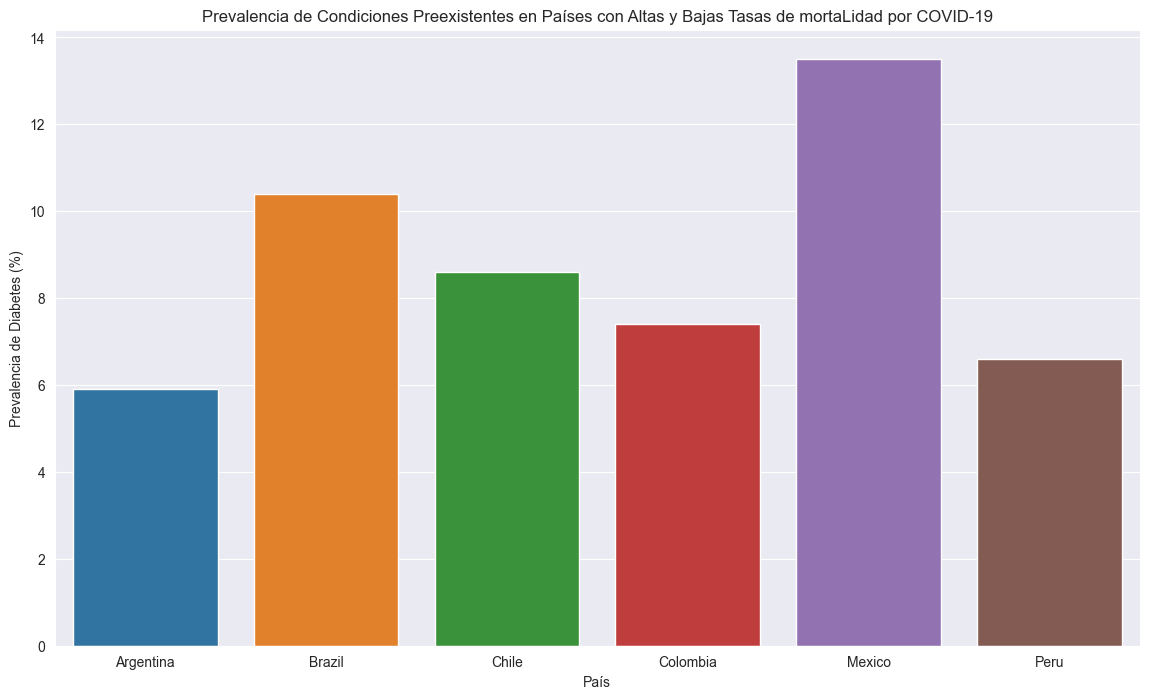

In [147]:

top_countries = datos_finales.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index

bottom_countries =  datos_finales.groupby('country_name') ['cumulative_deceased'].max().nsmallest(5).index
conditions_data = datos_finales[datos_finales['country_name'].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(14, 8))

sns.barplot(data=conditions_data, x="country_name", y='diabetes_prevalence', hue='country_name')

plt.xlabel("País")

plt.ylabel('Prevalencia de Diabetes (%)')

plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de mortaLidad por COVID-19')

plt.show()


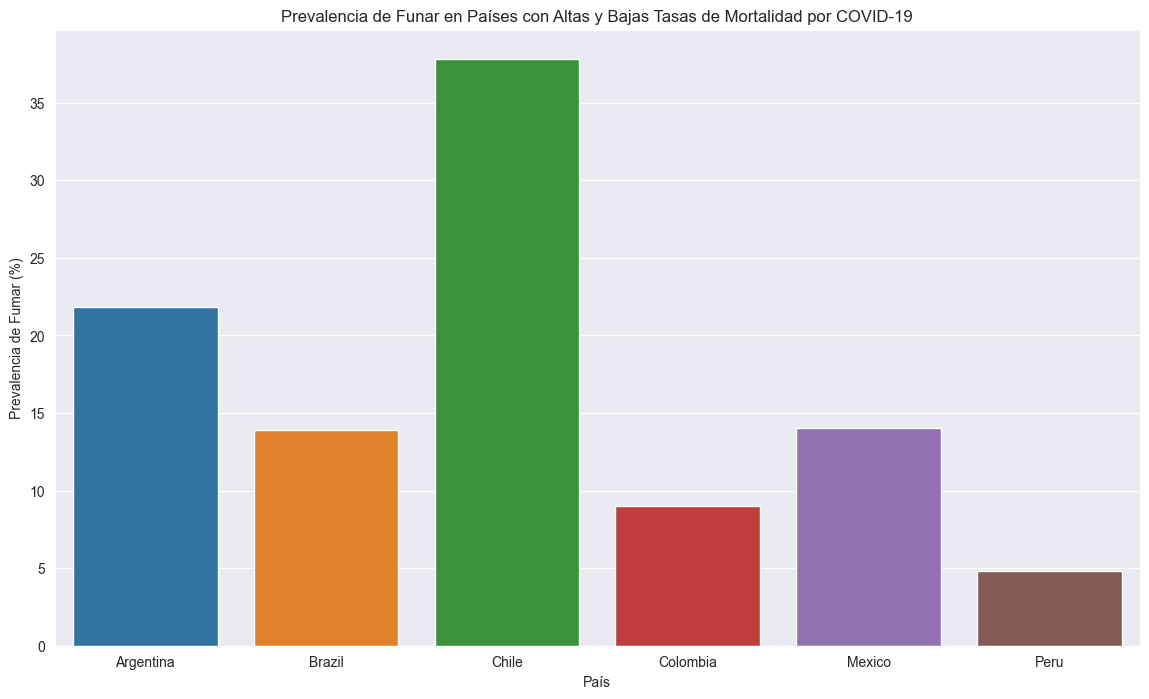

In [148]:

plt.figure(figsize=(14, 8))

sns.barplot(data=conditions_data, x="country_name", y='smoking_prevalence', hue='country_name')
plt.xlabel('País')

plt.ylabel('Prevalencia de Fumar (%)')

plt.title ('Prevalencia de Funar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_9088\3530332863.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( datos_finales, x='date', y='mortality_rate', estimator='mean', ci=None)


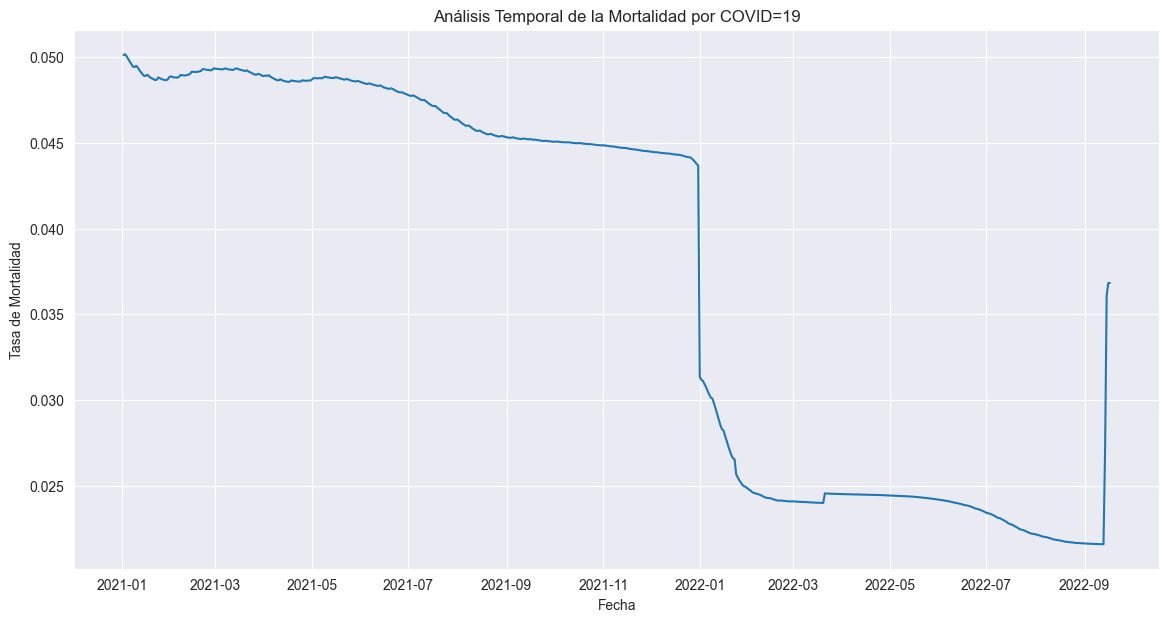

In [149]:
# cómo evolucionó la mortalidad
datos_finales['mortality_rate'] = datos_finales['cumulative_deceased'] / datos_finales['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot( datos_finales, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.title('Análisis Temporal de la Mortalidad por COVID=19')

plt.xlabel('Fecha')

plt.ylabel('Tasa de Mortalidad')

plt.show()

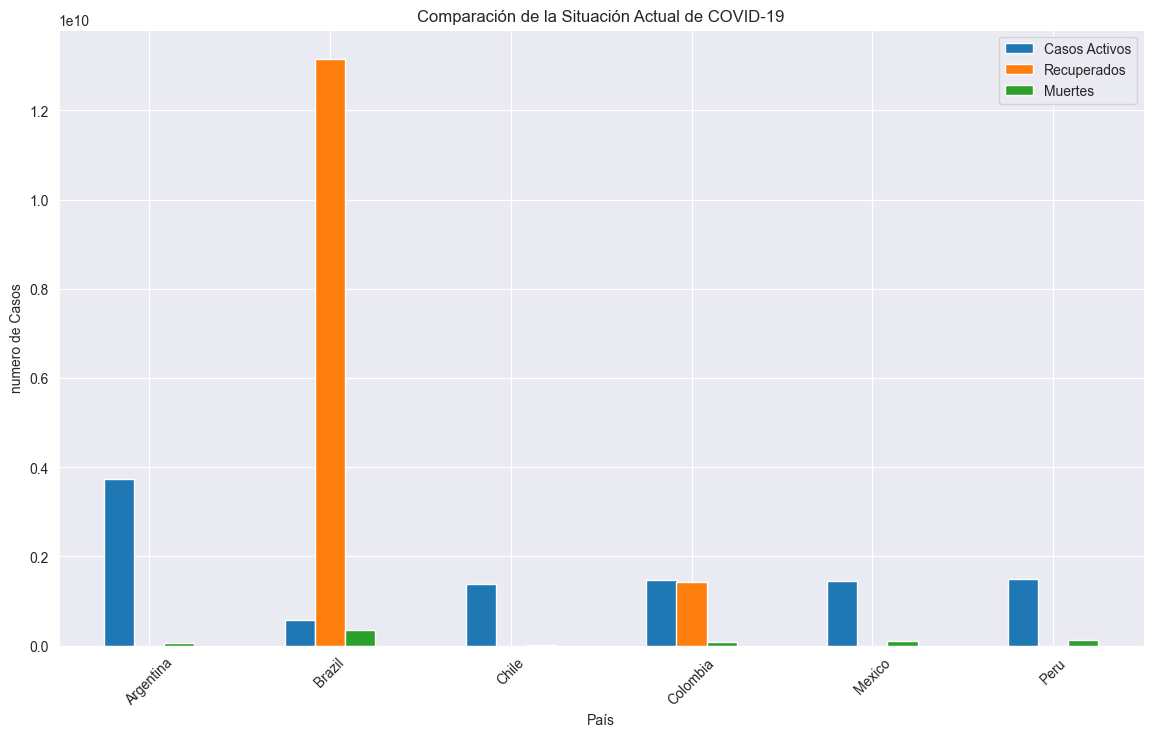

In [151]:
#o se tienen dato pero hay datos de recuperados y auertes en algunos polses
current_situation = datos_finales.groupby('country_name').sum()[['active_cases', 'cumulative_recovered','cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))

plt.title('Comparación de la Situación Actual de COVID-19')

plt.xlabel('País')

plt.ylabel('numero de Casos')

plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])

plt.xticks(rotation=45)

plt.show()

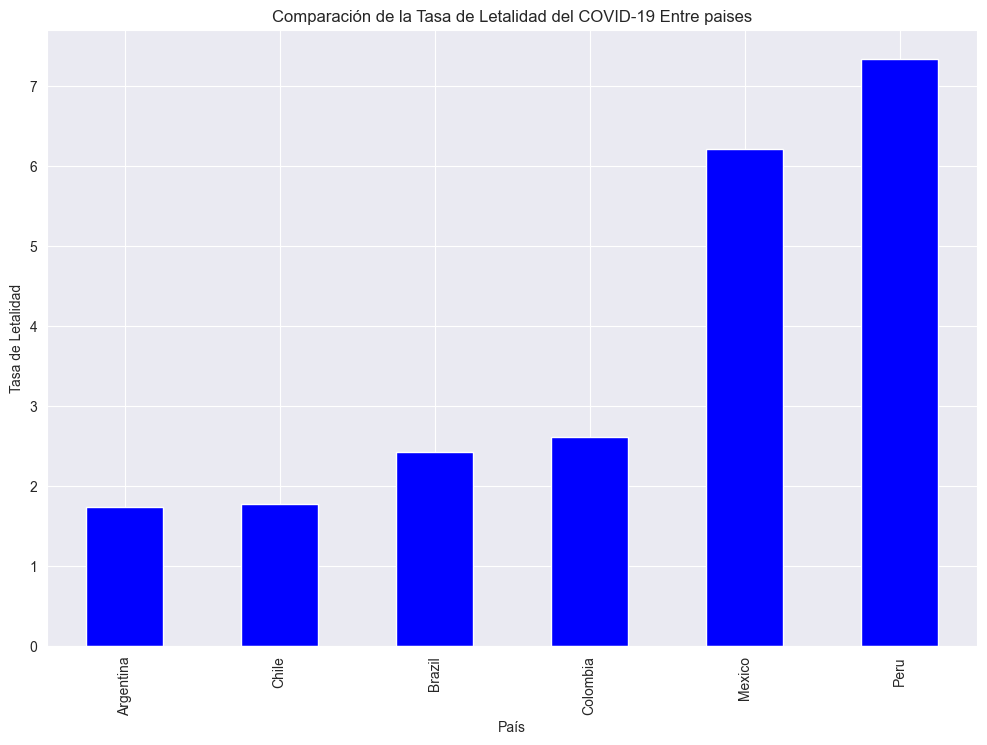

In [150]:
#Fatalidad por pais

datos_finales ['case_fatality_rate'] = datos_finales['cumulative_deceased'] / datos_finales['cumulative_confirmed'] * 100
fatality_rates = datos_finales.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))

fatality_rates.plot(kind='bar', color='blue')
plt.xlabel('País')

plt.ylabel('Tasa de Letalidad')

plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre paises')
plt.show()




In [152]:
datos_finales.to_csv("latam_datos1.csv", index=True)